##Project-

**Project Overview**-This project involves developing a comprehensive customer segmentation model using retail transaction data. The goal is to enhance marketing strategies and customer engagement by categorizing customers into distinct segments based on their behavior, preferences, and feedback.

Customer segmentation is the process of dividing a customer base into distinct groups based on shared characteristics, behaviors, or needs. This division allows businesses to tailor their marketing efforts and product offerings to better meet the specific demands of each segment.

Customer segmentation is crucial for several reasons:


* **Targeted Marketing**: By understanding the unique preferences and behaviors of different segments, companies can create more personalized and effective marketing campaigns.
* **Resource Optimization**: It helps in allocating marketing resources more efficiently, ensuring that promotions and advertisements reach the most relevant audiences.
* **Improved Customer Experience**: Tailoring products and services to specific segments enhances customer satisfaction and loyalty.
* **Strategic Decision-Making**: Insights from segmentation support better strategic planning and decision-making, driving growth and competitive advantage.



**Problem Statement**-In the retail industry, companies face significant challenges in effectively targeting and engaging their diverse customer base due to the complexity and volume of transaction data. Without a clear understanding of customer behavior, preferences, and purchasing patterns, marketing efforts may be inefficient and fail to resonate with key customer segments. This lack of precision can lead to suboptimal allocation of resources, missed opportunities for personalized interactions, and ultimately, diminished customer satisfaction and retention. To address these issues, there is a need for a robust customer segmentation approach that leverages transaction data to identify distinct customer groups, enabling targeted marketing strategies and enhancing overall business performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/new_retail_data.csv')

**Data Preprocessing**

In [ ]:
df.head()

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Australia  ...   1063.432799            Books  Penguin Books   
3  88420.0     Canada  ...   2466.854021       Home Decor     Home Depot   
4  48704.0         UK  ...    248.553049          Grocery         Nestle   

  Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent         Same-Day     Debit Card      Shipped   
1       Tablet  Excellent         Standard    Credit Card   Processing   
2   Children's    Average         Same-Day    Credit Card   Processing   
3        Tools  Excellent         Standard         PayPal   Processing   
4    Chocolate        Bad         Standard           Cash      Shipped   

   Ratings           products  
0      5.0     Cycling shorts  
1      4.0         Lenovo Tab  
2      2.0   Sports equipment  
3      4.0      Utility knife  
4      1.0  Chocolate cookies  

[5 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [ ]:
df.isna().sum()/len(df)*100

Transaction_ID      0.110261
Customer_ID         0.101983
Name                0.126486
Email               0.114897
Phone               0.119864
Address             0.104301
City                0.082116
State               0.093043
Zipcode             0.112579
Country             0.089732
Age                 0.057283
Gender              0.104963
Income              0.096023
Customer_Segment    0.071190
Date                0.118870
Year                0.115890
Month               0.090394
Time                0.115890
Total_Purchases     0.119532
Amount              0.118208
Total_Amount        0.115890
Product_Category    0.093706
Product_Brand       0.093043
Product_Type        0.000000
Feedback            0.060925
Shipping_Method     0.111586
Payment_Method      0.098341
Order_Status        0.077812
Ratings             0.060925
products            0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

4

In [ ]:
df.shape

(302010, 30)

In [ ]:
#drop null values and duplicate values

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(293908, 30)

In [ ]:
df.nunique()

Transaction_ID      287005
Customer_ID          86485
Name                156638
Email                52530
Phone               291620
Address             291610
City                   130
State                   54
Zipcode              93580
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83435
Total_Purchases         10
Amount              291615
Total_Amount        291618
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
dtype: int64

In [ ]:
df.dtypes

Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [ ]:
# changing data type of phone and zipcode from integer to string

df['Phone'] = df['Phone'].astype(object)
df['Zipcode'] = df['Zipcode'].astype(object)

In [ ]:
# changing data type of customer id and transaction id to object and year to int

df['Customer_ID'] = df['Customer_ID'].astype(object)
df['Transaction_ID'] = df['Transaction_ID'].astype(object)
df['Year']=df['Year'].astype(int)

In [ ]:
# changing date column to datetime data type

df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.dtypes

Transaction_ID              object
Customer_ID                 object
Name                        object
Email                       object
Phone                       object
Address                     object
City                        object
State                       object
Zipcode                     object
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                         int64
Month                       object
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ratings                    float64
products                    object
dtype: object

In [ ]:

df.describe().T

count                           mean                  min  \
Age              293908.0                       35.46553                 18.0   
Date               293908  2023-08-30 16:41:17.673285632  2023-03-01 00:00:00   
Year             293908.0                    2023.165127               2023.0   
Total_Purchases  293908.0                       5.359837                  1.0   
Amount           293908.0                     255.153875            10.000219   
Total_Amount     293908.0                     1367.68418             10.00375   
Ratings          293908.0                        3.16232                  1.0   

                                 25%                  50%  \
Age                             22.0                 32.0   
Date             2023-05-31 00:00:00  2023-08-31 00:00:00   
Year                          2023.0               2023.0   
Total_Purchases                  3.0                  5.0   
Amount                    132.837594           255.464523   
Total_Amount              438.844052           1041.16429   
Ratings                          2.0                  3.0   

                                 75%                  max         std  
Age                             46.0                 70.0   15.017638  
Date             2023-11-30 00:00:00  2024-02-29 00:00:00         NaN  
Year                          2023.0               2024.0    0.371295  
Total_Purchases                  8.0                 10.0    2.868441  
Amount                    377.639394           499.997911  141.389109  
Total_Amount             2028.951754          4999.625796  1128.89884  
Ratings                          4.0                  5.0    1.320755

##**EDA**


**univariate analysis-
(Numeric columns)**

Histogram

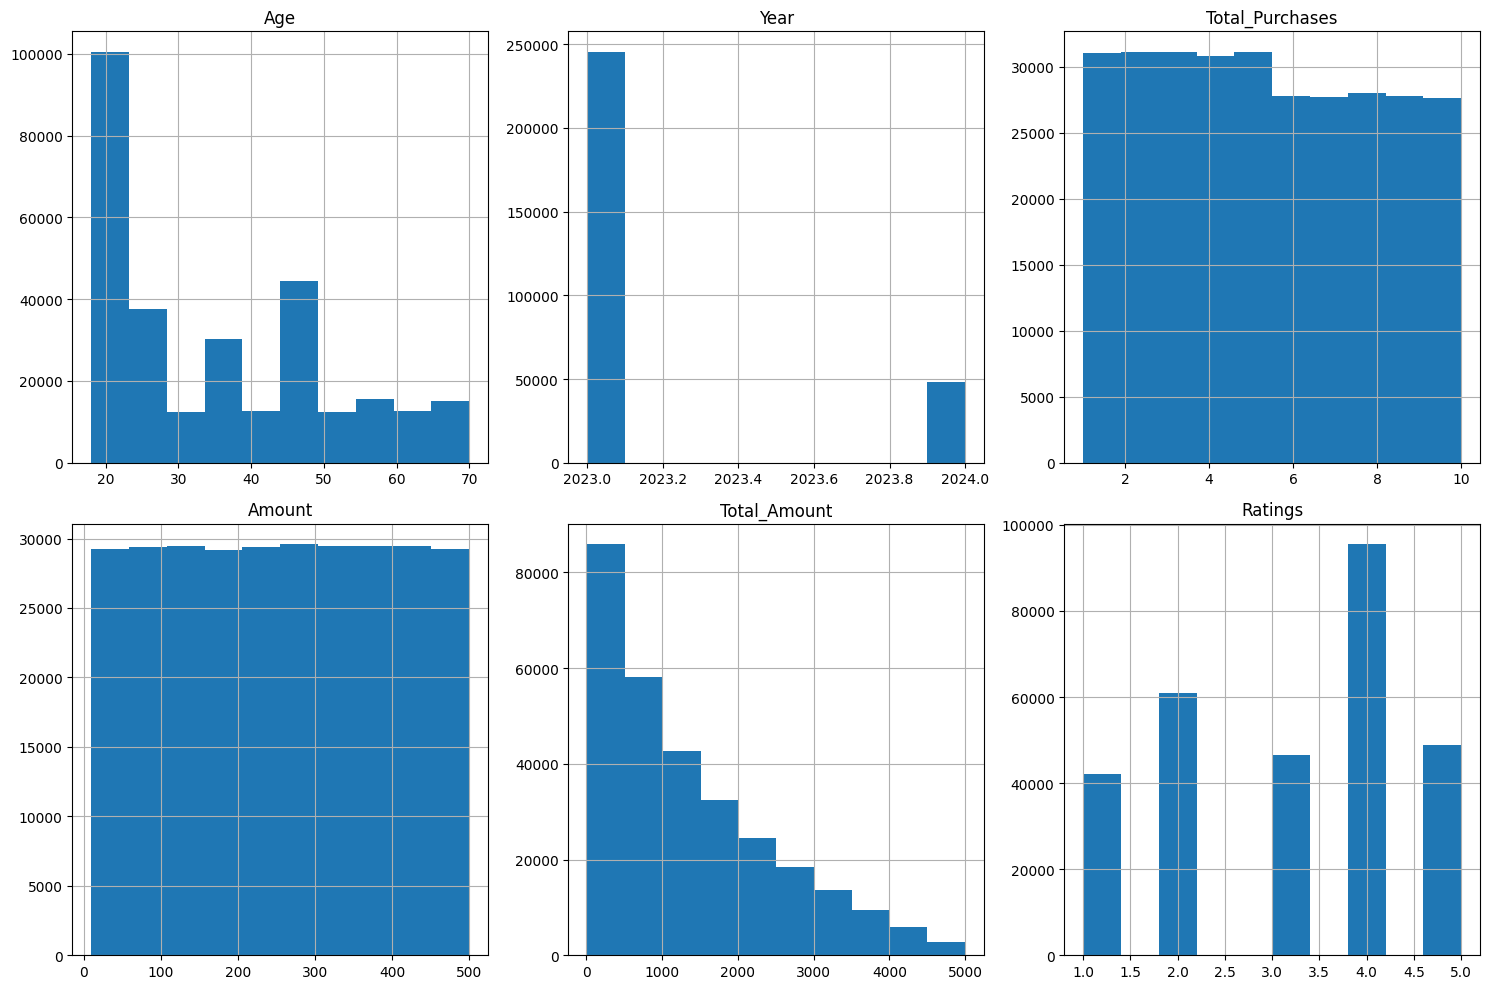

In [ ]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Plotting histograms
df[numeric_columns].hist(figsize=(15, 10), layout=(2,3))
plt.tight_layout()
plt.show()


Boxplot

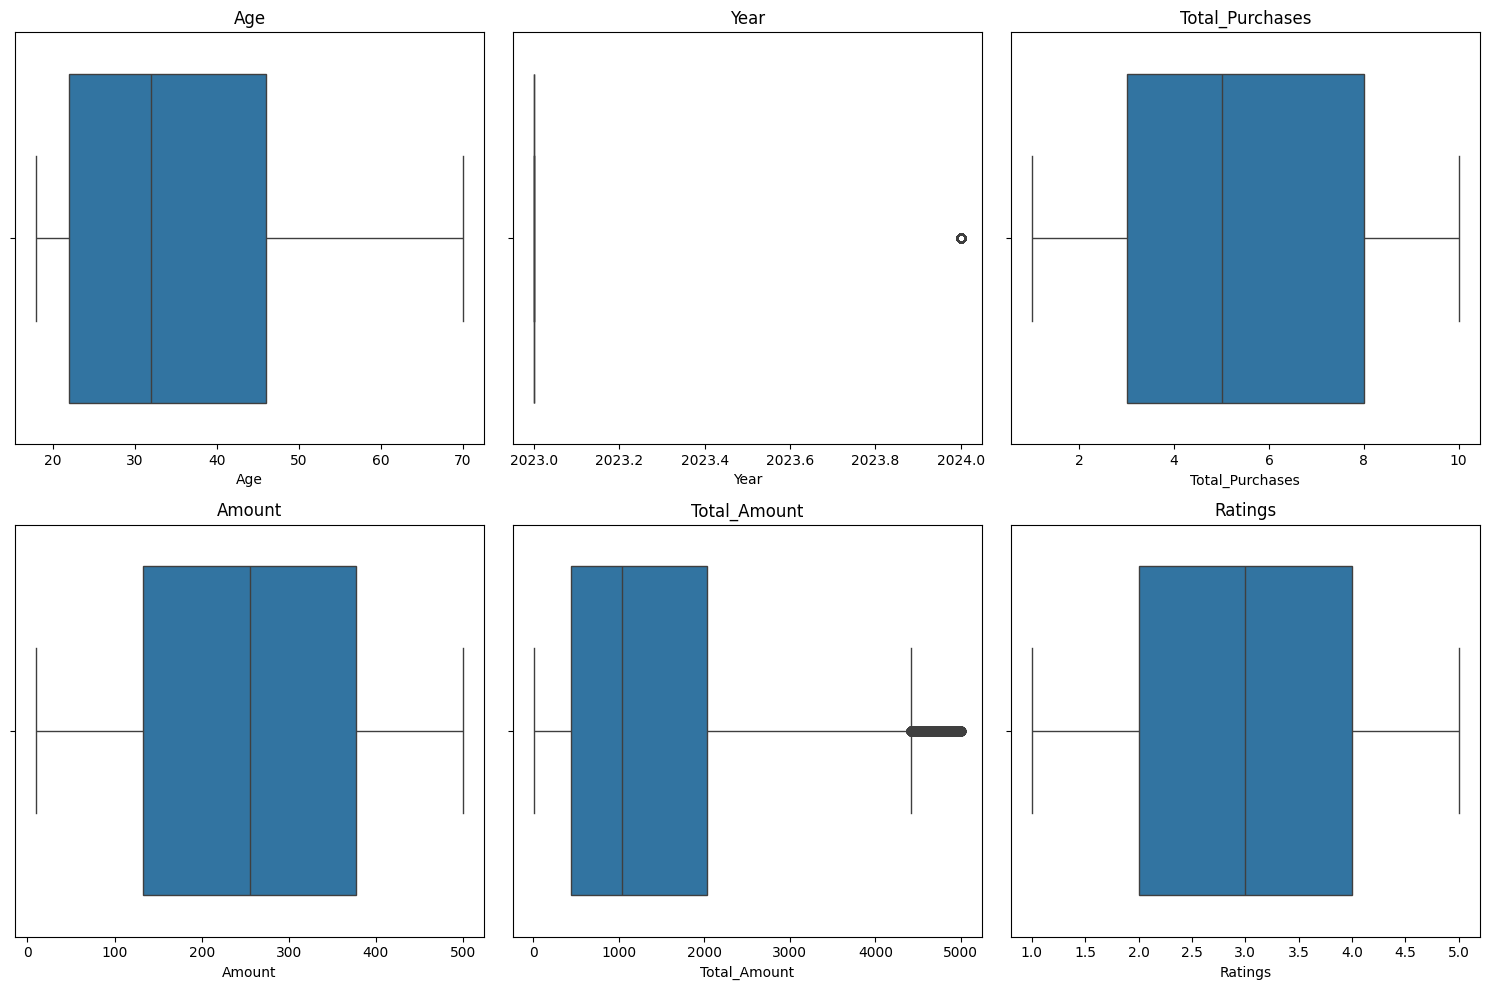

In [ ]:
# Plotting box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(2,3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
# Skewness value for all numeric columns
skewness = df[numeric_columns].skew()
print(skewness)

Age                0.654366
Year               1.803824
Total_Purchases    0.072437
Amount            -0.002033
Total_Amount       0.972928
Ratings           -0.241327
dtype: float64


Density plot

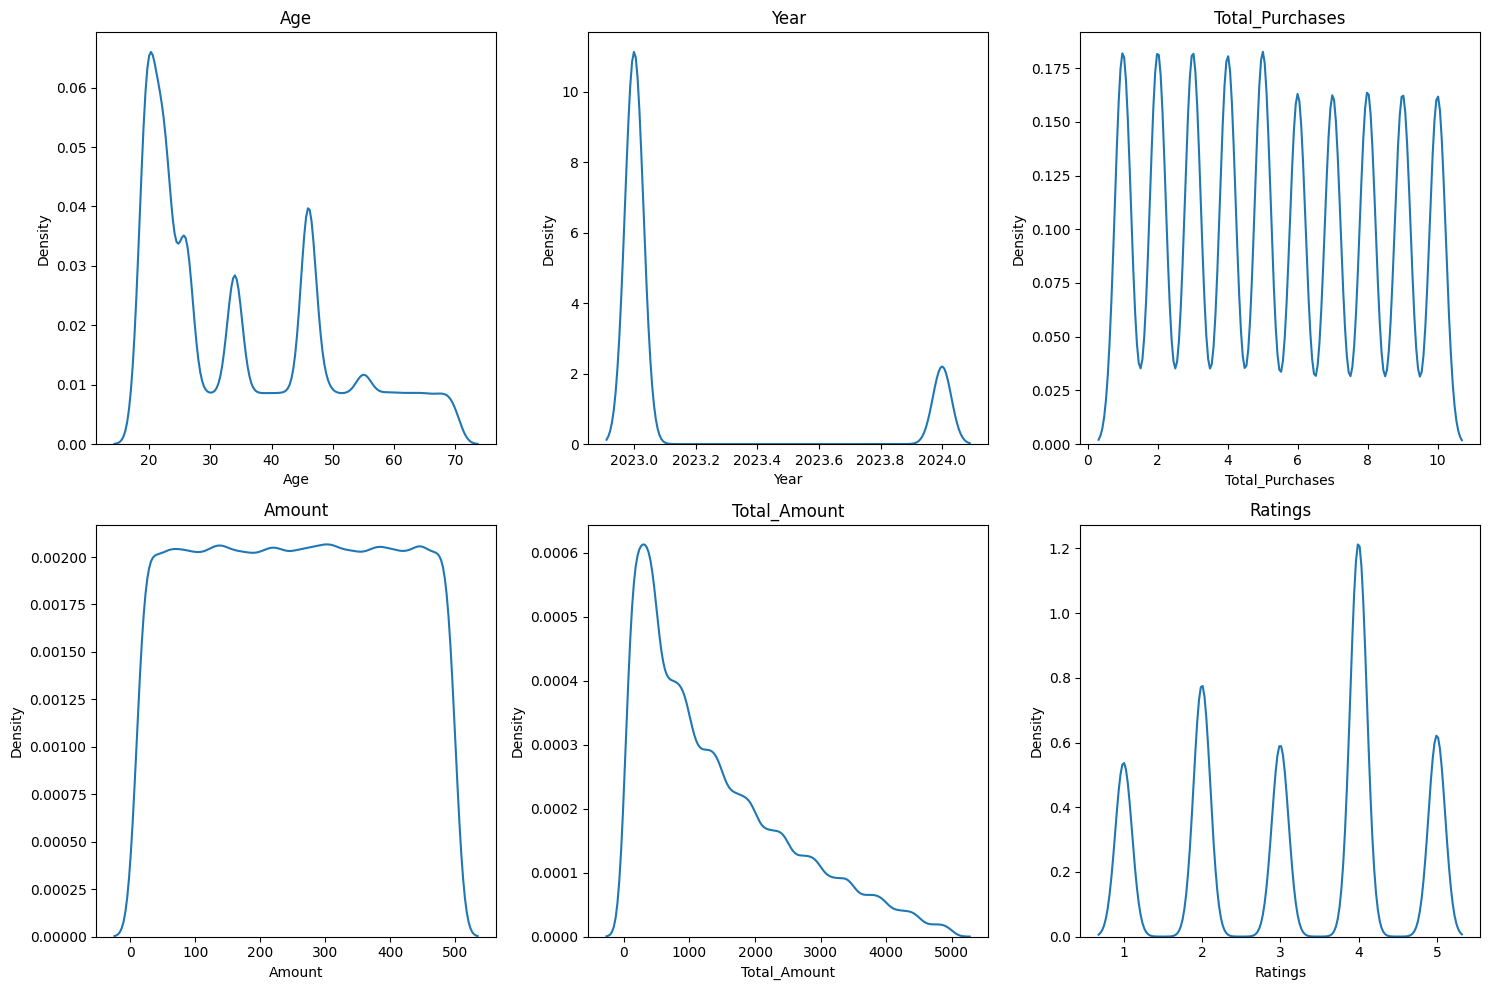

In [ ]:
# Plotting density plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(2,3, i + 1)
    sns.kdeplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
# unique values in all numeric columns
for column in numeric_columns:
    unique_values = df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Age': 53
Unique values in column 'Year': 2
Unique values in column 'Total_Purchases': 10
Unique values in column 'Amount': 291615
Unique values in column 'Total_Amount': 291618
Unique values in column 'Ratings': 5


Year histogram


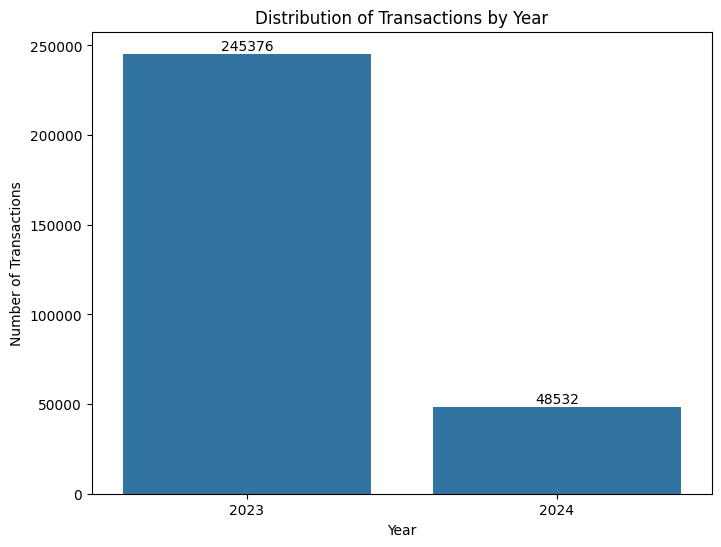

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Year', data=df)
plt.title('Distribution of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')

for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(height)}' for height in container.datavalues])

plt.show()


Univariate Analysis (Categorical columns)

In [ ]:
# list of categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Gender', 'Income', 'Customer_Segment', 'Month', 'Time', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'products']


**Distribution of Categorical Variables**

################# Country######################


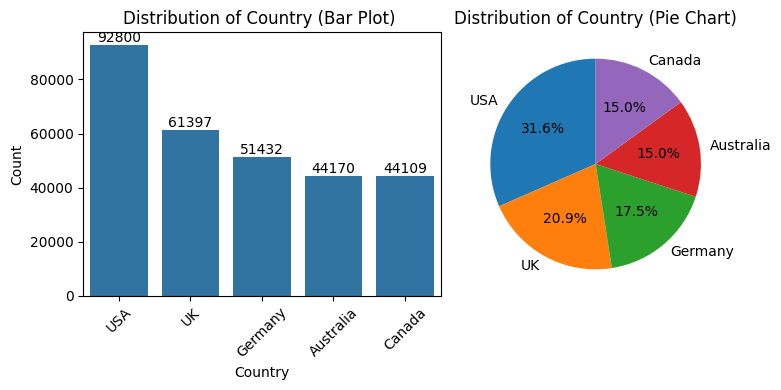

################# Gender######################


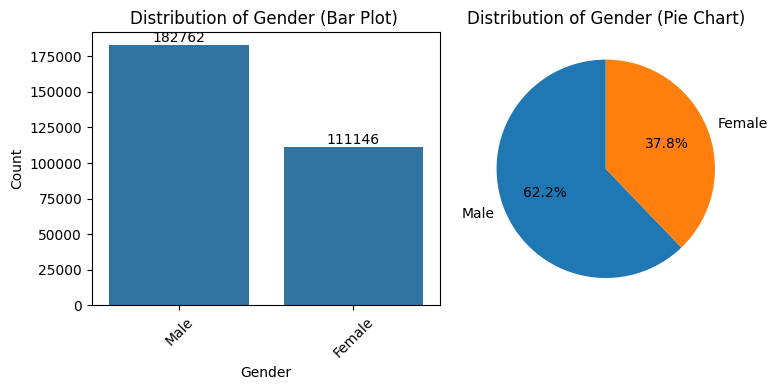

################# Income######################


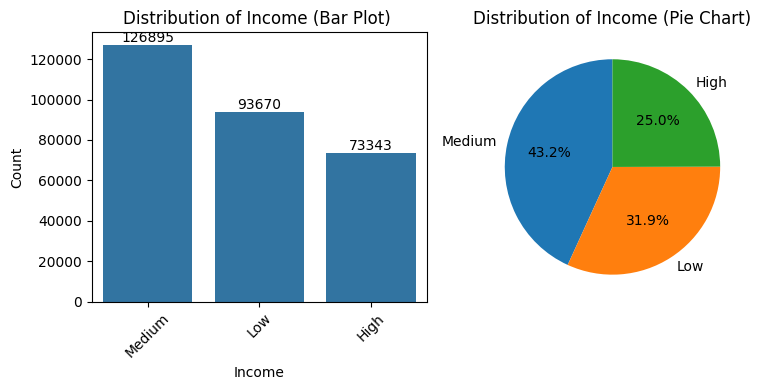

################# Customer_Segment######################


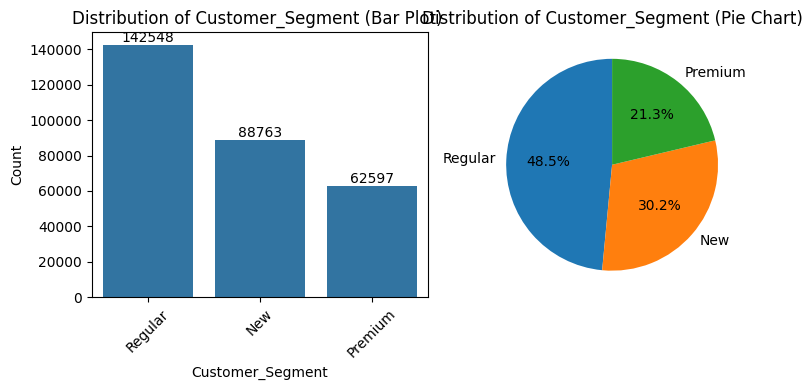

################# Product_Category######################


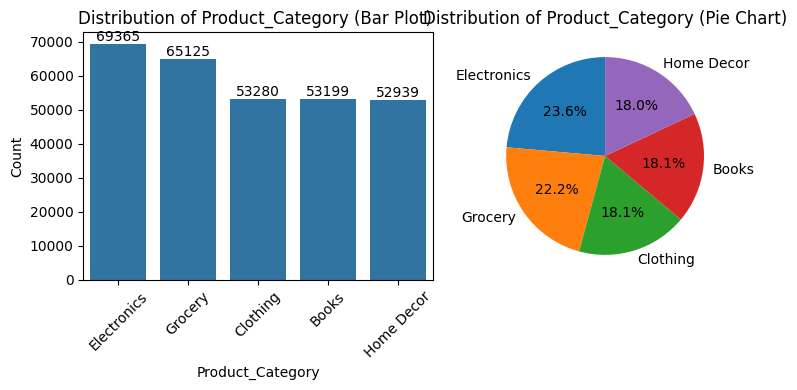

################# Feedback######################


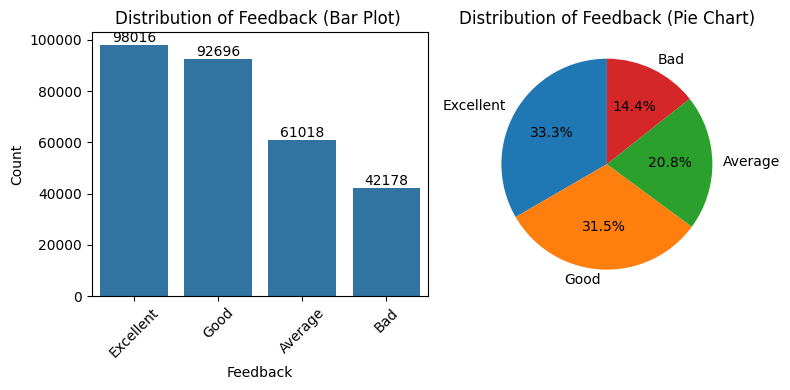

################# Shipping_Method######################


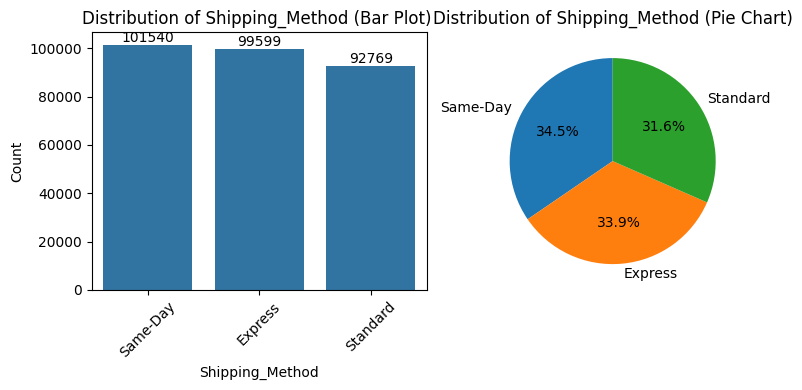

################# Payment_Method######################


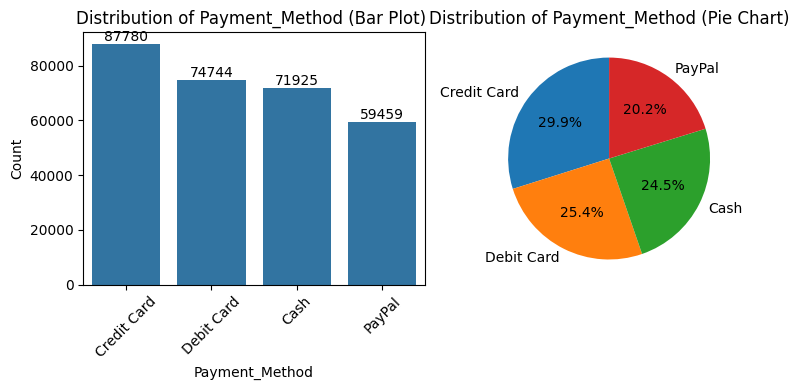

################# Order_Status######################


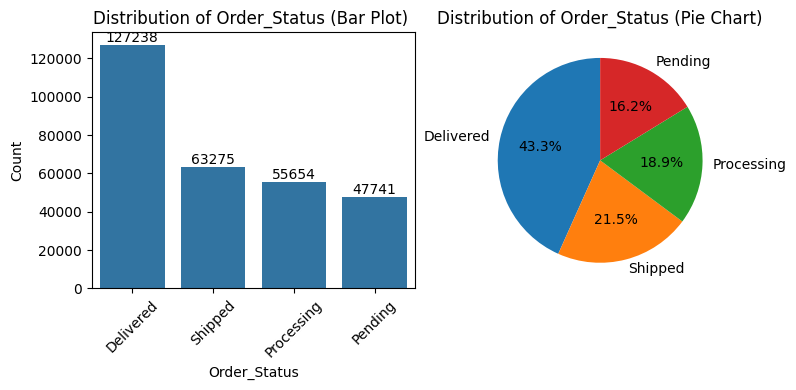

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    if df[column].nunique() <= 10:
        print(f"################# {column}######################")  # Print column name above the charts

        # Bar plot and pie chart for the current categorical column
        plt.figure(figsize=(8, 4))

        # Bar plot
        plt.subplot(1, 2, 1)
        ax = sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Distribution of {column} (Bar Plot) ')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        for container in ax.containers:
            ax.bar_label(container, label_type='edge')

        # Pie chart
        plt.subplot(1, 2, 2)
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {column} (Pie Chart)')

        plt.tight_layout()
        plt.show()


* Highest number of Transactions are done in USA.
* Majority Transactions are done by Males.
* It is also evident that more transactions are happening from customers which belong to Medium income category.
* Regular customers have maximum number of transactions followed by New customers and Premium customers.
* Electronics are the most popular product category
* The feedback is mostly good or excellent. There is only 14% of bad feedback.
* All three shipping methods are equally popular
* Credit and debit cards are more frequently used for making payments.
* More orders have been delivered. Around 16% of the orders are in pending status.



Text(0.5, 1.0, 'Distribution of age')

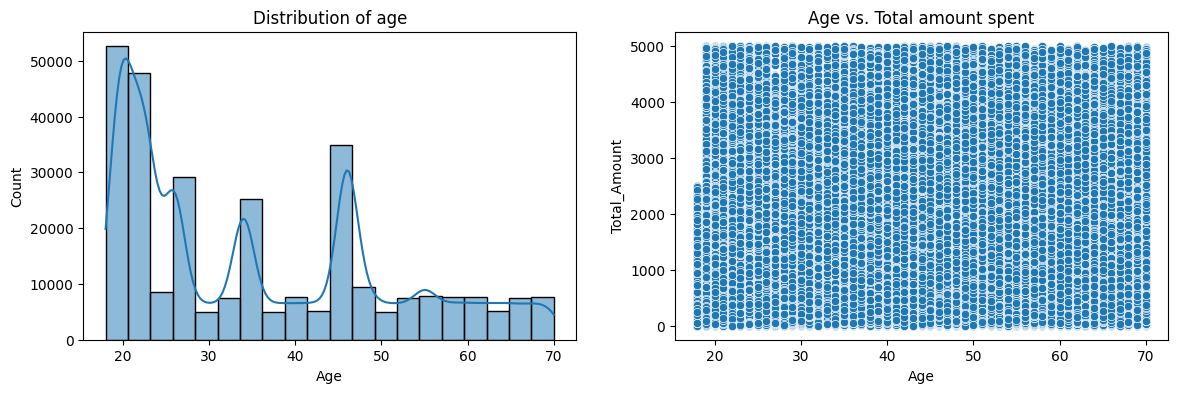

In [ ]:
f,axes = plt.subplots(1,2,figsize=(14,4))
ax = sns.scatterplot(x = df['Age'], y=df['Total_Amount'],ax=axes[1])
ax.set_title("Age vs. Total amount spent")
ax = sns.histplot(x = df['Age'], bins=20, kde=True,ax=axes[0])
ax.set_title("Distribution of age")

Text(0.5, 1.0, 'Payment method used vs Age')

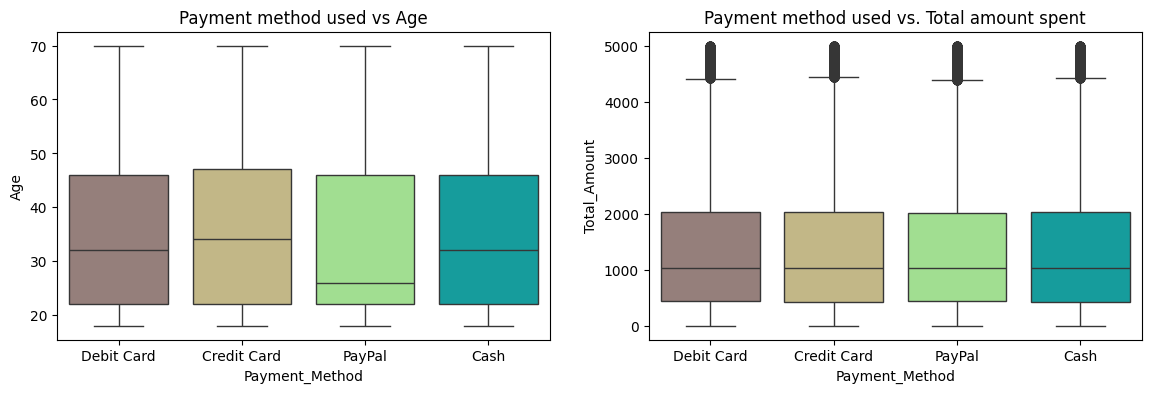

In [ ]:
f,axes = plt.subplots(1,2,figsize=(14,4))
ax = sns.boxplot(x = df['Payment_Method'], y=df['Total_Amount'],palette = 'terrain_r', ax=axes[1])
ax.set_title("Payment method used vs. Total amount spent")
ax = sns.boxplot(x = df['Payment_Method'], y=df['Age'],palette = 'terrain_r',ax=axes[0])
ax.set_title("Payment method used vs Age")

1. More customers are below the age of 30.
2. There appears to be no correlation between age and amount being spent.
3. The mean age is least for customers using PayPal for payment and highest for customers using credit card
4. There mean amount being spent on all payment methods are similar.


Product Brand

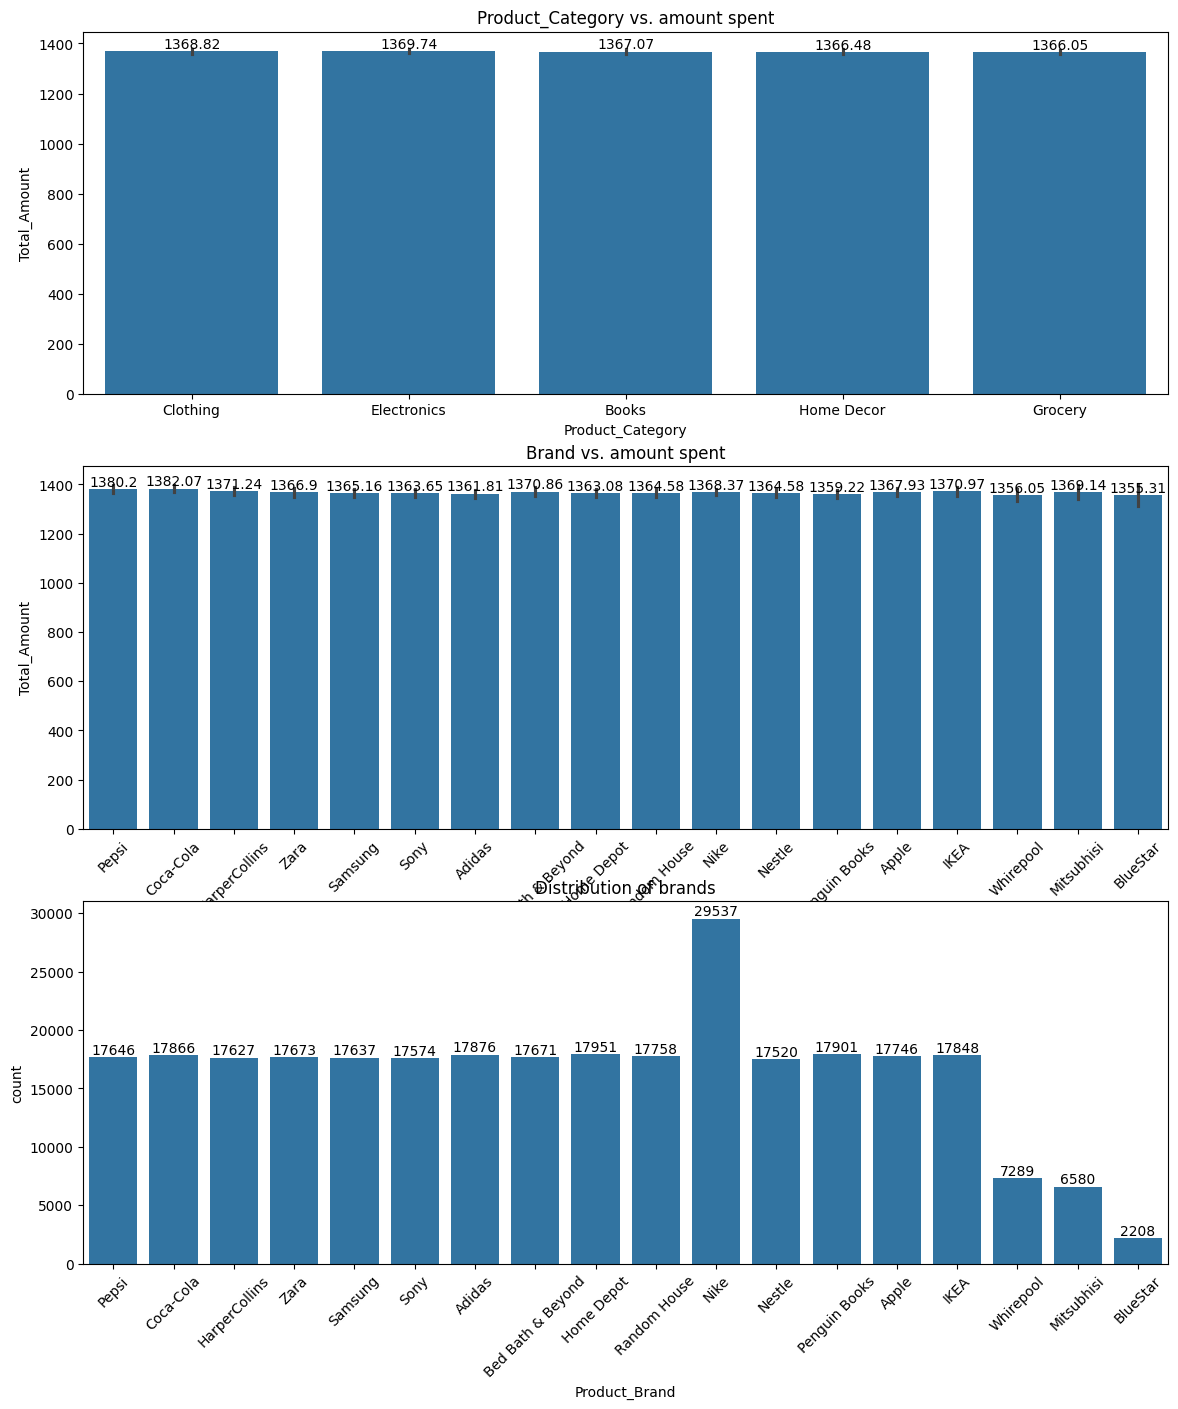

In [ ]:
f,axes = plt.subplots(3,1,figsize=(14,16))

#plotting product_category vs amount spent
ax = sns.barplot(x = df['Product_Category'], y=df['Total_Amount'],ax=axes[0])
ax.set_title("Product_Category vs. amount spent")
for i in ax.containers:
    ax.bar_label(i)

#plotting Brand vs Mean amount spend
ax = sns.barplot(x = df['Product_Brand'], y=df['Total_Amount'],ax=axes[1])
ax.set_title("Brand vs. amount spent")
ax.set_xticklabels(labels = list(dict(df['Product_Brand'].value_counts()).keys()), rotation=45)
for i in ax.containers:
    ax.bar_label(i)

#plotting distribution of brands
ax = sns.countplot(x = df['Product_Brand'],ax=axes[2])
ax.set_title("Distribution of brands")
ax.set_xticklabels(labels = list(dict(df['Product_Brand'].value_counts()).keys()), rotation=45)
for i in ax.containers:
    ax.bar_label(i)



* The mean amount spent on all product categories or brands are the similar.
* But the number of orders for Nike is maximum and BlueStar is minimum.



##**Bivariate Analysis**



* **Top 10 & Bottom 10 Transactions per City**
* **Top 10 & Bottom 10 Transactions per State**
* **Top 10 & Bottom 10 Transactions per Product Brands**
* **Top 10 & Bottom 10 Transactions per Products**






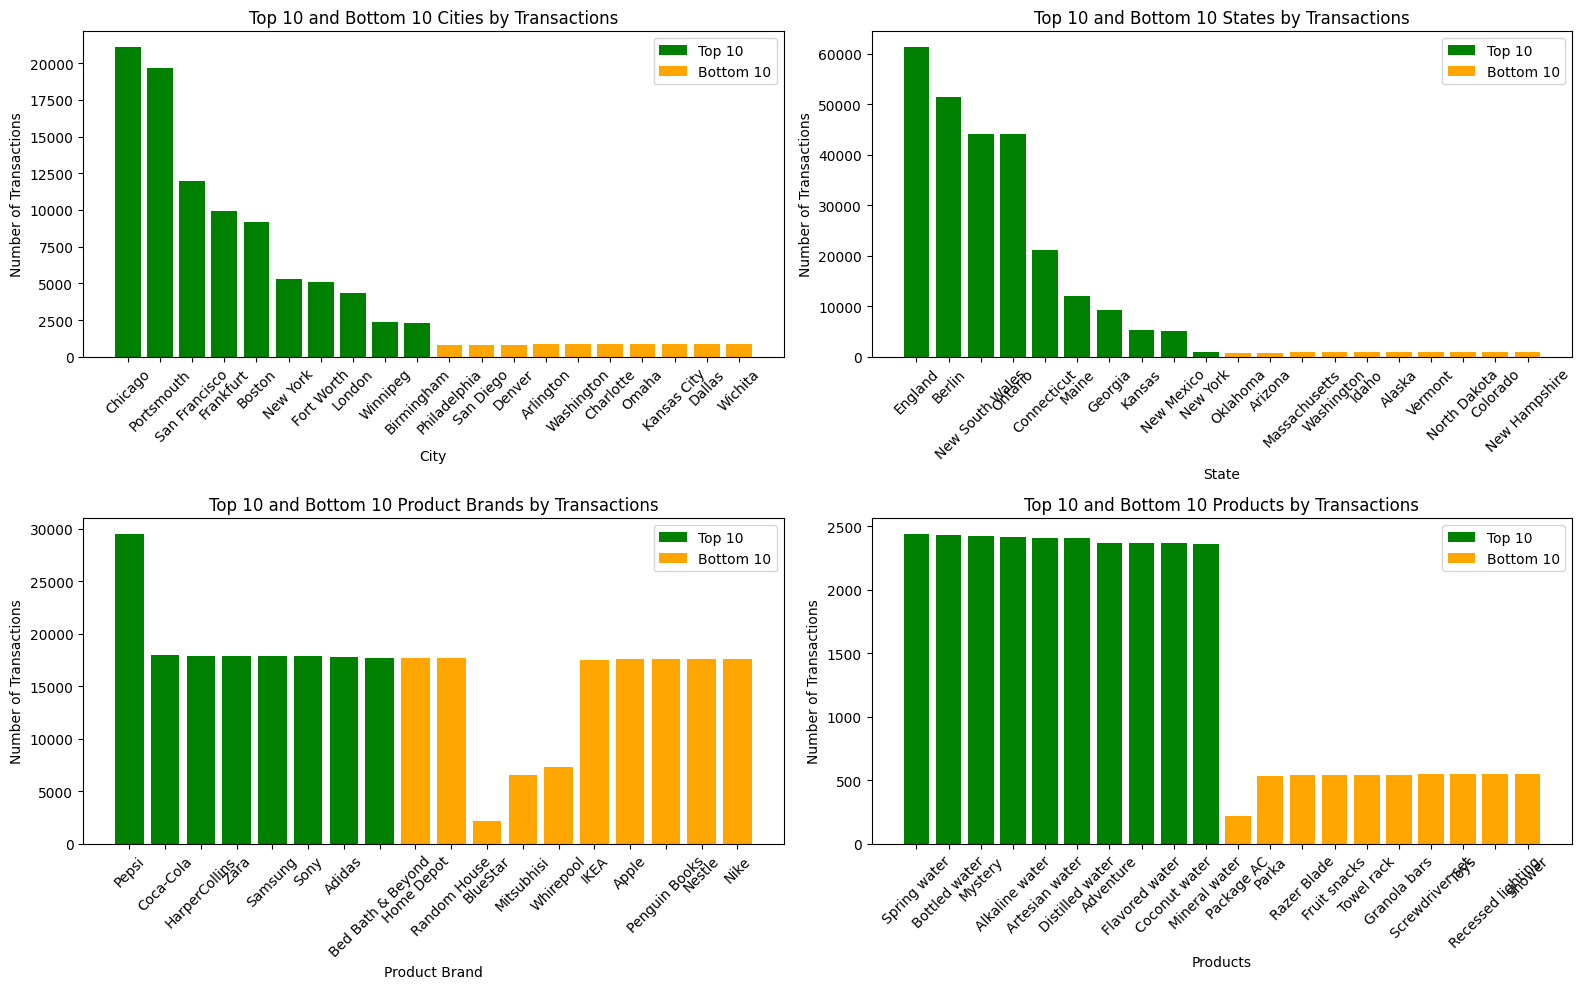

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top 10 and Bottom 10 Cities
top_10_cities = df['City'].value_counts().nlargest(10)
bottom_10_cities = df['City'].value_counts().nsmallest(10)

axes[0, 0].bar(top_10_cities.index, top_10_cities.values, color='green', label='Top 10')
axes[0, 0].bar(bottom_10_cities.index, bottom_10_cities.values, color='orange', label='Bottom 10')
axes[0, 0].set_title('Top 10 and Bottom 10 Cities by Transactions')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend()

# Top 10 and Bottom 10 States
top_10_states = df['State'].value_counts().nlargest(10)
bottom_10_states = df['State'].value_counts().nsmallest(10)

axes[0, 1].bar(top_10_states.index, top_10_states.values, color='green', label='Top 10')
axes[0, 1].bar(bottom_10_states.index, bottom_10_states.values, color='orange', label='Bottom 10')
axes[0, 1].set_title('Top 10 and Bottom 10 States by Transactions')
axes[0, 1].set_xlabel('State')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()

# Top 10 and Bottom 10 Product Brands
top_10_brands = df['Product_Brand'].value_counts().nlargest(10)
bottom_10_brands = df['Product_Brand'].value_counts().nsmallest(10)

axes[1, 0].bar(top_10_brands.index, top_10_brands.values, color='green', label='Top 10')
axes[1, 0].bar(bottom_10_brands.index, bottom_10_brands.values, color='orange', label='Bottom 10')
axes[1, 0].set_title('Top 10 and Bottom 10 Product Brands by Transactions')
axes[1, 0].set_xlabel('Product Brand')
axes[1, 0].set_ylabel('Number of Transactions')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()

# Top 10 and Bottom 10 Products
top_10_products = df['products'].value_counts().nlargest(10)
bottom_10_products = df['products'].value_counts().nsmallest(10)

axes[1, 1].bar(top_10_products.index, top_10_products.values, color='green', label='Top 10')
axes[1, 1].bar(bottom_10_products.index, bottom_10_products.values, color='orange', label='Bottom 10')
axes[1, 1].set_title('Top 10 and Bottom 10 Products by Transactions')
axes[1, 1].set_xlabel('Products')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**Top Brands for each income**

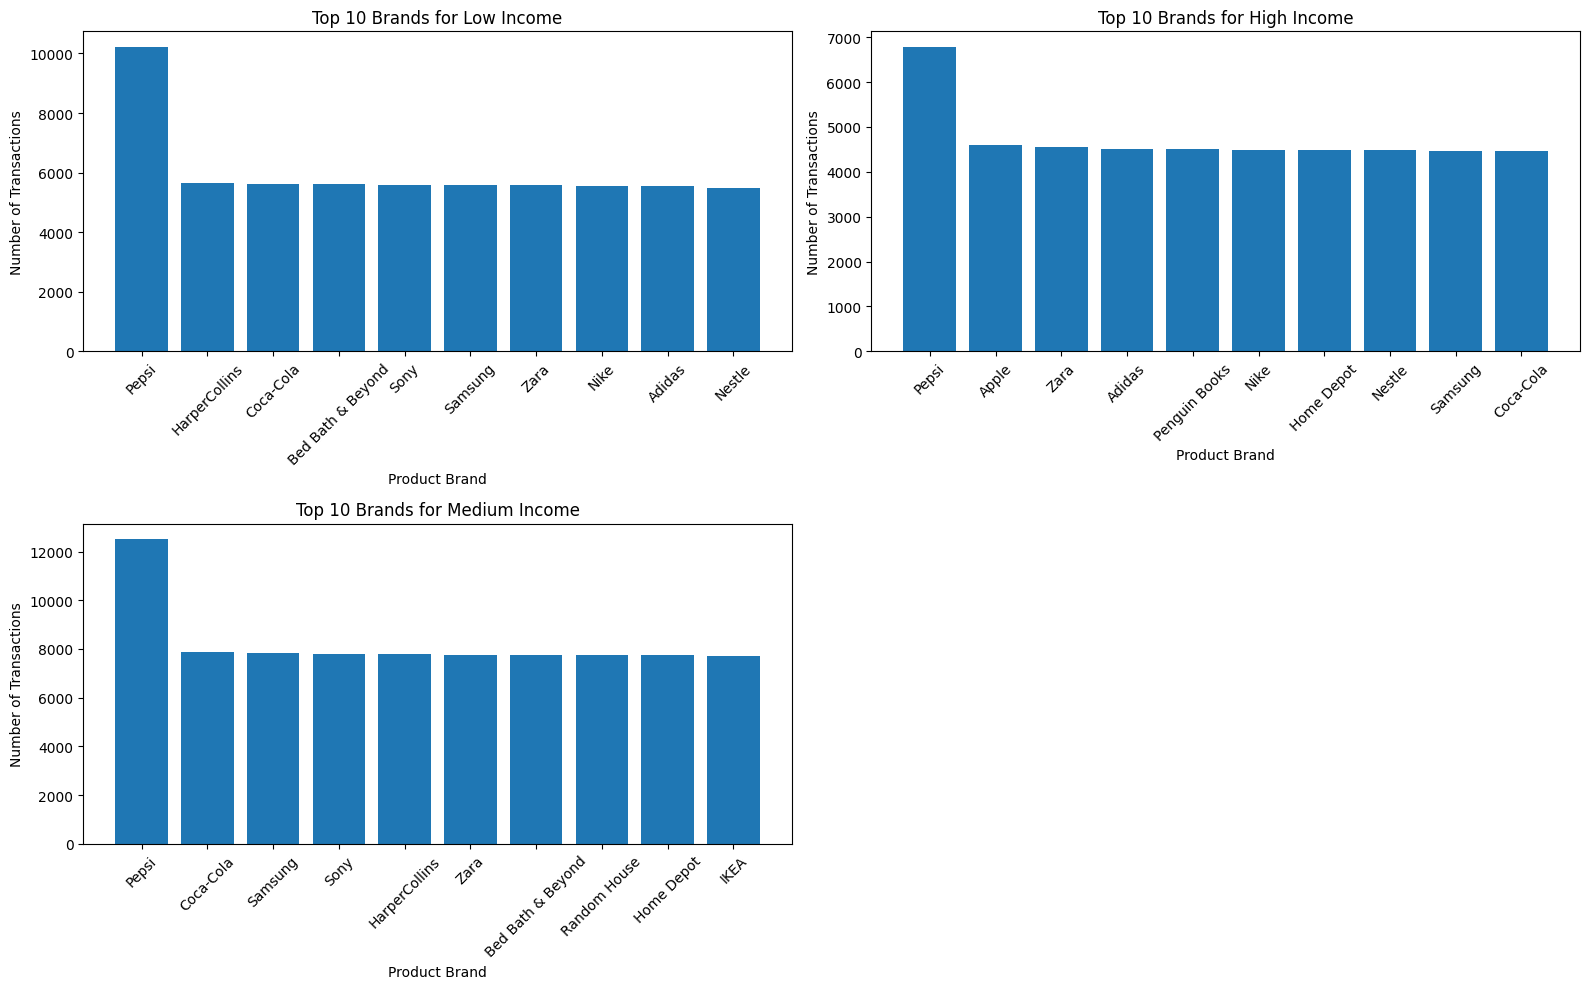

In [ ]:
income_categories = df['Income'].unique()
top_n = 10  # Number of top brands to display

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, income in enumerate(income_categories):
    if i >= len(axes):
        break  # Stop if we run out of subplots

    top_brands = df[df['Income'] == income]['Product_Brand'].value_counts().nlargest(top_n)

    axes[i].bar(top_brands.index, top_brands.values)
    axes[i].set_title(f'Top {top_n} Brands for {income} Income')
    axes[i].set_xlabel('Product Brand')
    axes[i].set_ylabel('Number of Transactions')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Pepsi is most popular brand among every income group

**Relation regarding Customer Segment**

Text(0.5, 1.0, 'Customer segment vs. Age')

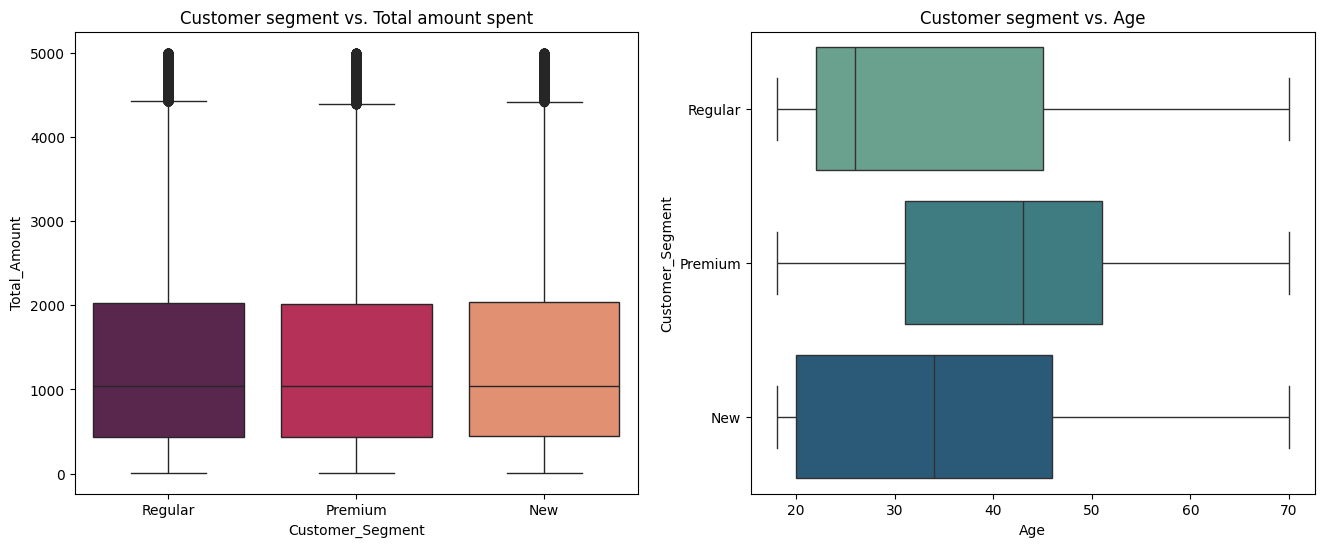

In [ ]:
f,axes = plt.subplots(1,2,figsize=(16,6))
ax = sns.boxplot(x = df['Customer_Segment'], y=df['Total_Amount'],palette = 'rocket', ax=axes[0])
ax.set_title("Customer segment vs. Total amount spent")
ax = sns.boxplot(y = df['Customer_Segment'], x=df['Age'],palette = 'crest', orient='h',ax=axes[1])
ax.set_title("Customer segment vs. Age")



* All customer segments are have similar mean spending
* It can be seen that Premium segment has the highest mean age whereas the Regular segment has the lowest mean age



**Monthly Sales by product_Category**

Text(0.5, 1.0, 'Productwise Monthly sales')

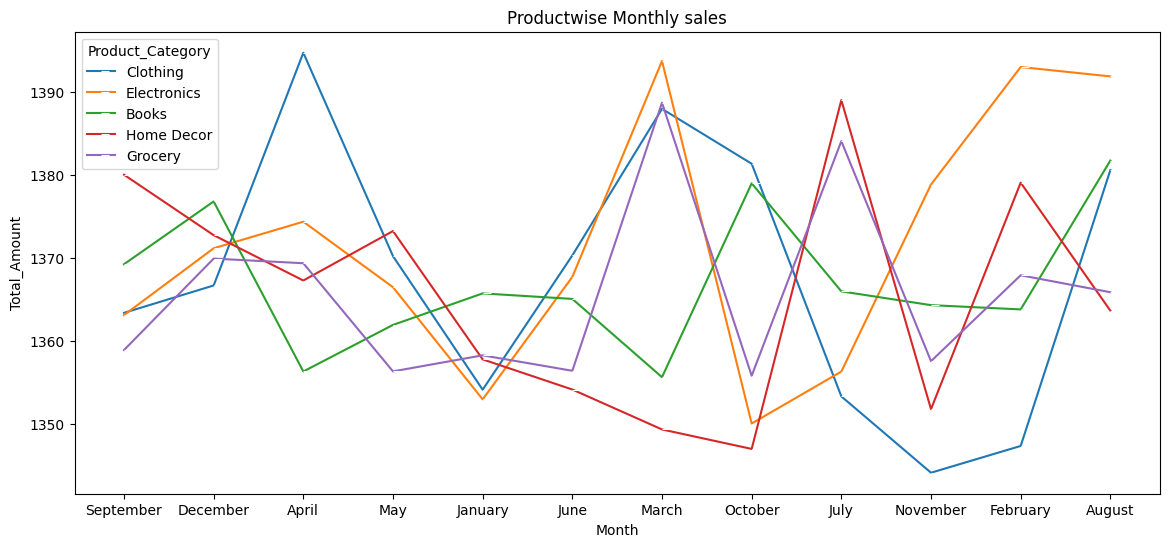

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(x = df['Month'], y=df['Total_Amount'],hue=df['Product_Category'],marker=True,err_style=None)
ax.set_title("Productwise Monthly sales")

**Income vs amount spent and Mean age**

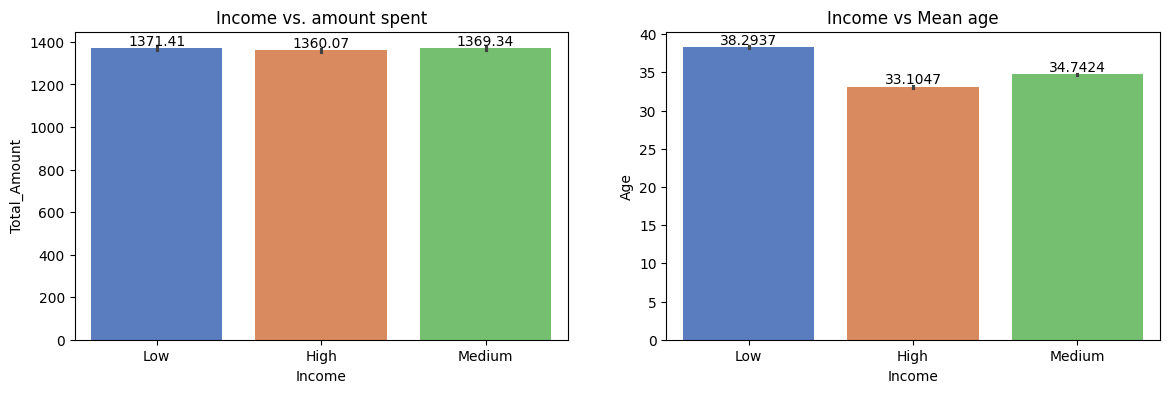

In [ ]:
f,axes = plt.subplots(1,2,figsize=(14,4))
ax = sns.barplot(x = df['Income'], y=df['Total_Amount'],palette= 'muted', ax=axes[0])
ax.set_title("Income vs. amount spent")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df['Income'], y=df['Age'],palette='muted',ax=axes[1])
ax.set_title("Income vs Mean age")
for i in ax.containers:
    ax.bar_label(i)

1) The mean amount spent on purchases is lowest for high income customers whereas it is highest for low income customers

2) The mean age is lowest for High income group whereas it is highest for low income customers.

**Average amount spent by country and gender**

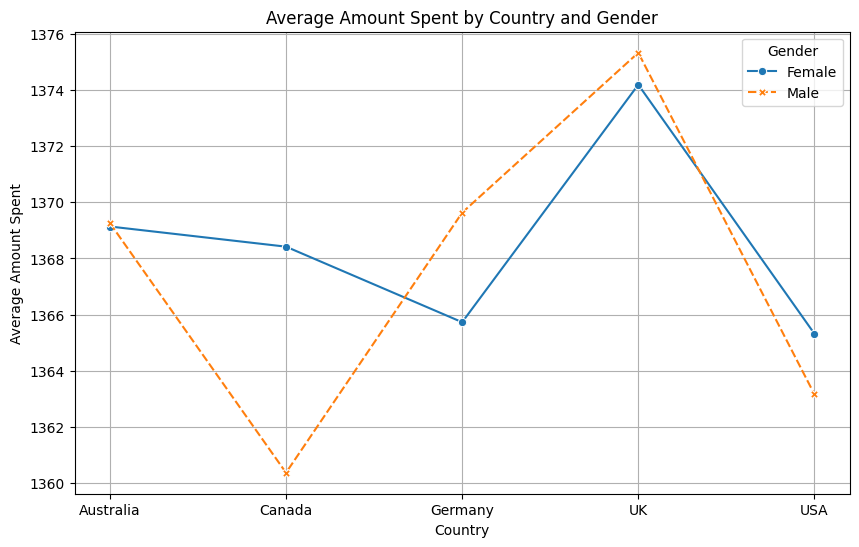

In [ ]:
# Group the data by Country and Gender and calculate the mean Total_Amount
grouped_data = df.groupby(['Country', 'Gender'])['Total_Amount'].mean().reset_index()

# Pivot the data to create a DataFrame suitable for line plotting
pivot_data = grouped_data.pivot(index='Country', columns='Gender', values='Total_Amount')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_data, markers=True)
plt.title('Average Amount Spent by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Average Amount Spent')
plt.grid(True)
plt.legend(title='Gender')
plt.show()


* Average Amount spent is highest in UK and lowest in Canada.
* Average Amount spent by Males is least in Canada & highest in UK.



**Average Amount spent by product Category and Gender**

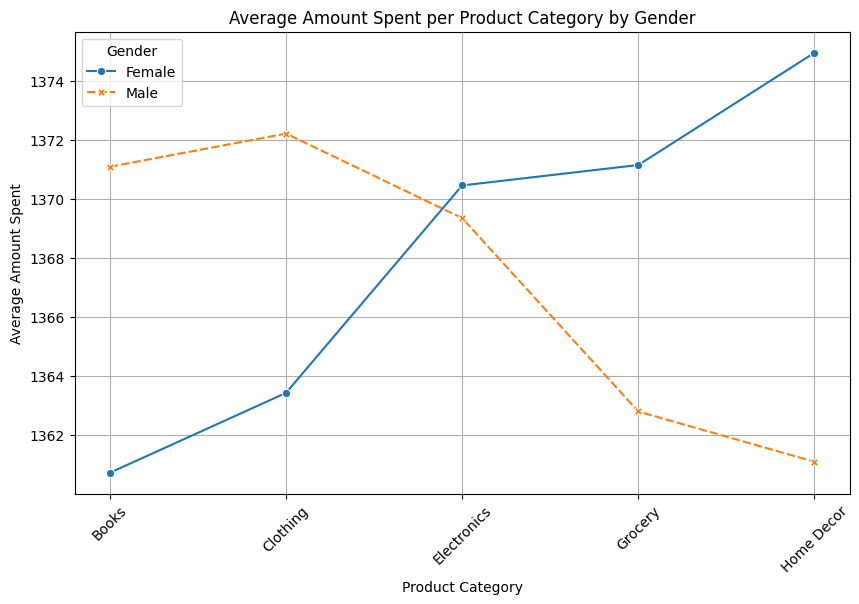

In [ ]:
# Group the data by Product_Category and Gender and calculate the mean Total_Amount
grouped_data = df.groupby(['Product_Category', 'Gender'])['Total_Amount'].mean().reset_index()

# Pivot the data to create a DataFrame suitable for line plotting
pivot_data = grouped_data.pivot(index='Product_Category', columns='Gender', values='Total_Amount')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_data, markers=True)
plt.title('Average Amount Spent per Product Category by Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Amount Spent')
plt.grid(True)
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Distribution of Total Purchases vs Product Category Countrywise

Text(0.5, 1.0, 'Total purchases vs. Product Category')

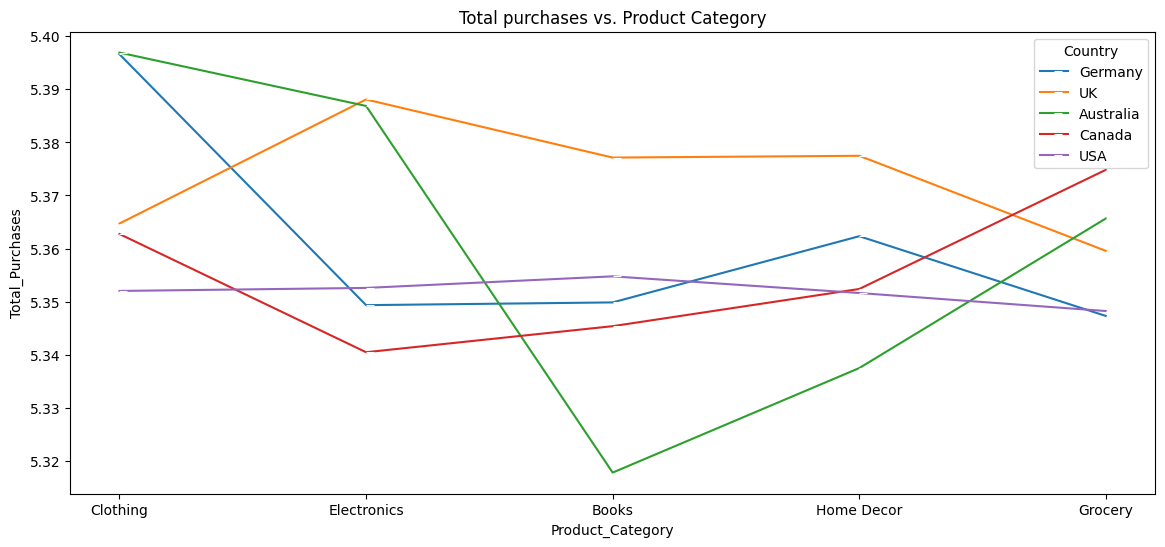

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(x = df['Product_Category'], y=df['Total_Purchases'],hue=df['Country'],marker=True,err_style=None)
ax.set_title("Total purchases vs. Product Category")

Total purchase vs Total category

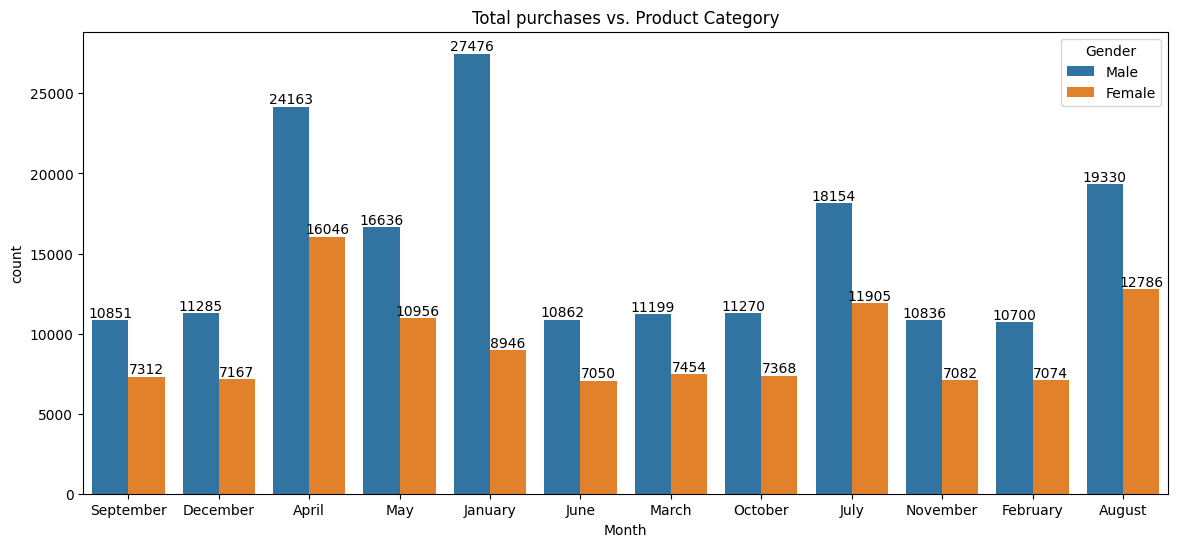

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x=df['Month'],hue=df['Gender'])
ax.set_title("Total purchases vs. Product Category")
for i in ax.containers:
    ax.bar_label(i)

##**RFM**

RFM : Recency-Frequency-Monetary

These are the 3 main attributes by which we can segment our customers for better advertising as well as customer service.


* Recency: How recently the customer has made purchases. A customer who is more recent has better value for the business and their feedback has higher impact.
* Frequency : How frequently a particular customer has made purchases. Naturally, these are loyal customers and new discounts or offers can be given to such customers.
* Monetary: How much money is a customer spending on his purchases. The higher the spending, the more valuable the customer is.

Thus, the business should look for customers that have a higher Frequency and Monetary value and lower Recency

In [ ]:
rfm= df[['Customer_ID','Total_Amount','Date','Transaction_ID']]

In [ ]:
rfm_m=rfm.groupby('Customer_ID')['Total_Amount'].sum().reset_index()
rfm_m.columns=['Customer_ID','Monetary']
rfm_m.head()

Customer_ID     Monetary
0      10000.0  5007.566357
1      10001.0  8136.462824
2      10002.0  4104.013951
3      10003.0  2340.496447
4      10004.0  2356.516683

In [ ]:
rfm_f=rfm.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
rfm_f.columns=['Customer_ID','Frequency']
rfm_f.head()

Customer_ID  Frequency
0      10000.0          4
1      10001.0          5
2      10002.0          5
3      10003.0          2
4      10004.0          2

In [ ]:
#Recency

rfm['Days_diff'] = max(rfm['Date']) - rfm['Date']
rfm_r = rfm.groupby('Customer_ID')['Days_diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r.columns = ['Customer_ID', 'Recency']
rfm_r['Recency'] = rfm_r['Recency'].dt.days
rfm_r.head()

Customer_ID  Recency
0      10000.0      102
1      10001.0      104
2      10002.0       94
3      10003.0      227
4      10004.0       30

In [ ]:
#Combining all columns into a single dataframe
rfm_final = rfm[['Customer_ID']]
rfm_final = pd.merge(rfm_final, rfm_r, on='Customer_ID', how='inner')
rfm_final = pd.merge(rfm_final, rfm_f, on='Customer_ID', how='inner')
rfm_final = pd.merge(rfm_final, rfm_m, on='Customer_ID', how='inner')
rfm_final.head()

Customer_ID  Recency  Frequency     Monetary
0     37249.0       23          5  6485.389528
1     37249.0       23          5  6485.389528
2     37249.0       23          5  6485.389528
3     37249.0       23          5  6485.389528
4     37249.0       23          5  6485.389528

Text(0.5, 0, 'Attributes')

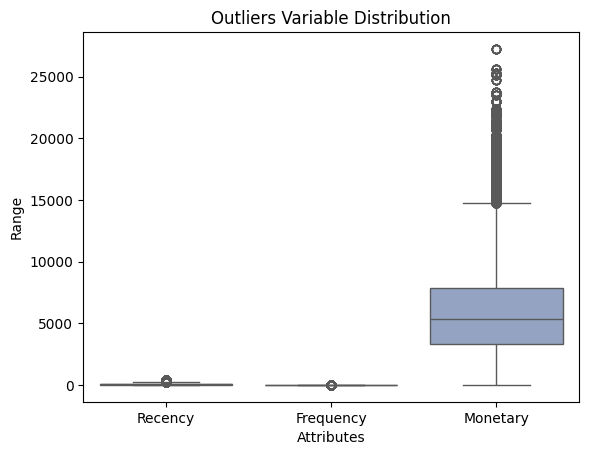

In [ ]:
attributes = ['Recency','Frequency','Monetary']
sns.boxplot(data = rfm_final[attributes], orient="v", palette="Set2")
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("Attributes")

In [ ]:
#Finding how many % of outlier are in all 3 columns

# Calculate IQR for each attribute
Q1 = rfm_final[attributes].quantile(0.25)
Q3 = rfm_final[attributes].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((rfm_final[attributes] < lower_bound) | (rfm_final[attributes] > upper_bound)).sum()

# Calculate percentage of outliers for each attribute
outlier_percentage = (outliers / rfm_final.shape[0]) * 100

print(outlier_percentage)


Recency      3.499394
Frequency    2.083985
Monetary     1.528029
dtype: float64


In [ ]:
# setting outliers value to values Q1-1.5 IQR and Q1+ 1.5 IQR

for attribute in attributes:
  rfm_final[attribute] = np.clip(rfm_final[attribute], lower_bound[attribute], upper_bound[attribute])


Text(0.5, 0, 'Attributes')

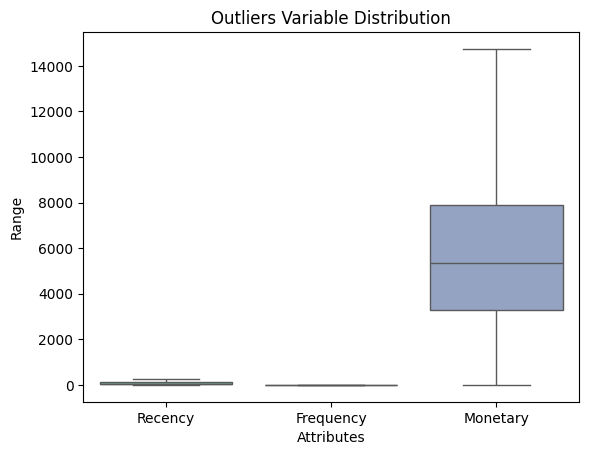

In [ ]:
attributes = ['Recency','Frequency','Monetary']
sns.boxplot(data = rfm_final[attributes], orient="v", palette="Set2")
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("Attributes")

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_df = rfm_final[['Monetary', 'Frequency', 'Recency']]

# Fit and transform the 'Recency', 'Frequency', and 'Monetary' columns
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(293908, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['Monetary', 'Frequency', 'Recency'])
rfm_df_scaled.head()

Monetary  Frequency   Recency
0  0.200541   0.429236 -0.810046
1  0.200541   0.429236 -0.810046
2  0.200541   0.429236 -0.810046
3  0.200541   0.429236 -0.810046
4  0.200541   0.429236 -0.810046

## **K-Means**

In [ ]:
from sklearn.cluster import KMeans


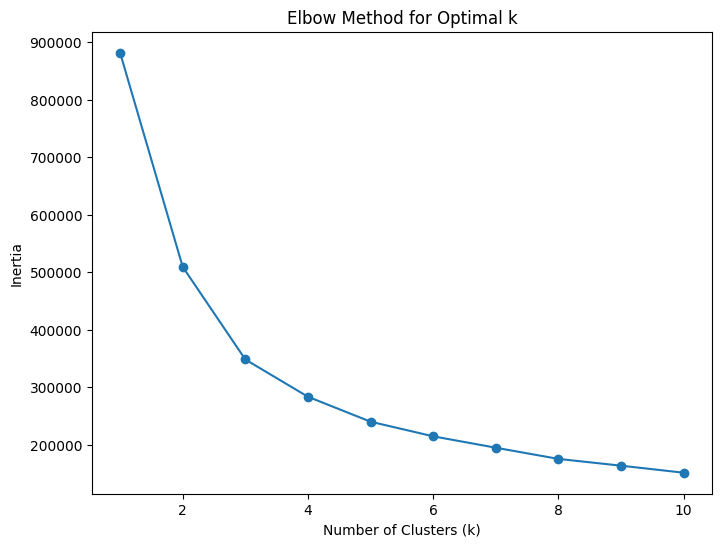

In [ ]:
# Elbow method to find optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=7)
    kmeans.fit(rfm_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # Davis-Bouldin score
    db_avg = davies_bouldin_score(rfm_df_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the Davies-Bouldin score is {db_avg}")

For n_clusters=2, the Davies-Bouldin score is 1.0710867303904643
For n_clusters=3, the Davies-Bouldin score is 0.9737299688599405
For n_clusters=4, the Davies-Bouldin score is 1.0719493127665305
For n_clusters=5, the Davies-Bouldin score is 1.0285855419165306
For n_clusters=6, the Davies-Bouldin score is 1.0958221749957515
For n_clusters=7, the Davies-Bouldin score is 1.0889922770753482
For n_clusters=8, the Davies-Bouldin score is 1.0676275459089881


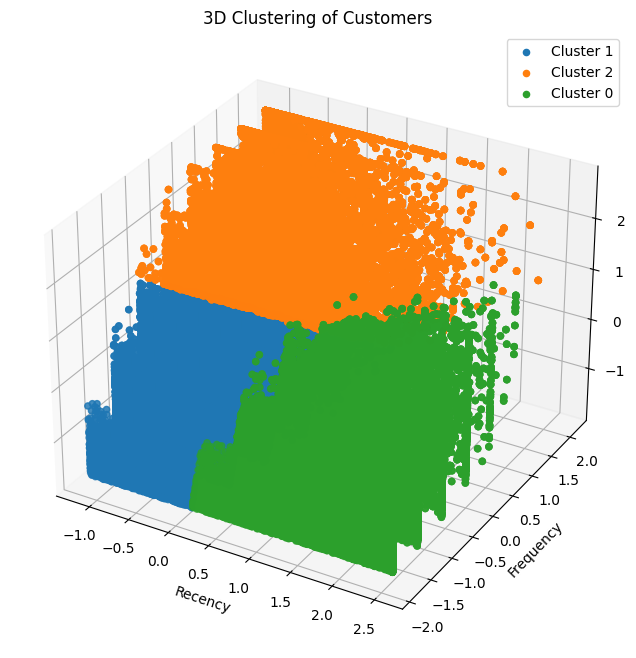

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=7)  # Adjust n_clusters as needed
kmeans.fit(rfm_df_scaled)
rfm_df_scaled['Cluster'] = kmeans.labels_

# Import necessary library
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in rfm_df_scaled['Cluster'].unique():
    cluster_data = rfm_df_scaled[rfm_df_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Clustering of Customers')
ax.legend()
plt.show()


In [ ]:
# Calculate the mean values for each RFM variable within each cluster
cluster_summary = rfm_df_scaled.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Print the cluster summary
print(cluster_summary)


          Recency  Frequency  Monetary
Cluster                               
0        1.543784  -0.851821 -0.666486
1       -0.429302  -0.370109 -0.464981
2       -0.420706   1.054478  1.062679


**Cluster 0: "Recently Engaged, Budget-Conscious Customers"**
These customers have recently interacted with the business but tend to make fewer and smaller purchases.

**Cluster 1:"Occasionally Active, Cost-Sensitive Shoppers"**
These customers engage with the business occasionally and exhibit moderate spending behavior, with a focus on lower-cost items.

**Cluster 2:"Loyal and High-Value Patrons"**
These are the business's most loyal customers, making frequent purchases and contributing significantly to revenue, even though their recent activity may have slowed down.


##Time Based Segmentation

In [ ]:
tbs= df[['Customer_ID','Date','Year','Month','Time']]

In [ ]:
# Create columns like week and seasonal pattern in tbs and add the data in it accordingly

# Assuming 'tbs' is your DataFrame with 'Date' column
tbs['Week'] = tbs['Date'].dt.isocalendar().week
tbs['Quarter'] = tbs['Date'].dt.quarter

# Map quarter to season
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}
tbs['Season'] = tbs['Quarter'].map(season_mapping)

tbs.head()


Customer_ID       Date  Year      Month      Time  Week  Quarter  Season
0     37249.0 2023-09-18  2023  September  22:03:55    38        3  Summer
1     69749.0 2023-12-31  2023   December   8:42:04    52        4    Fall
2     30192.0 2023-04-26  2023      April   4:06:29    17        2  Spring
3     62101.0 2023-05-08  2023        May  14:55:17    19        2  Spring
4     27901.0 2024-01-10  2024    January  16:54:07     2        1  Winter

In [ ]:
tbs['DayOfWeek'] = tbs['Date'].dt.dayofweek  # Monday=0, Sunday=6

tbs['Time'] = pd.to_datetime(tbs['Time'])
tbs['Hour'] = tbs['Time'].dt.hour

tbs['IsWeekend'] = tbs['DayOfWeek'].isin([5, 6]).astype(int)

In [ ]:
tbs['Customer_ID'] = df['Customer_ID']
tbs.head()


Customer_ID       Date  Year      Month                Time  Week  Quarter  \
0     37249.0 2023-09-18  2023  September 2024-08-17 22:03:55    38        3   
1     69749.0 2023-12-31  2023   December 2024-08-17 08:42:04    52        4   
2     30192.0 2023-04-26  2023      April 2024-08-17 04:06:29    17        2   
3     62101.0 2023-05-08  2023        May 2024-08-17 14:55:17    19        2   
4     27901.0 2024-01-10  2024    January 2024-08-17 16:54:07     2        1   

   Season  DayOfWeek  Hour  IsWeekend  
0  Summer          0    22          0  
1    Fall          6     8          1  
2  Spring          2     4          0  
3  Spring          0    14          0  
4  Winter          2    16          0

In [ ]:
tbs.head()

Customer_ID       Date  Year      Month                Time  Week  Quarter  \
0     37249.0 2023-09-18  2023  September 2024-08-17 22:03:55    38        3   
1     69749.0 2023-12-31  2023   December 2024-08-17 08:42:04    52        4   
2     30192.0 2023-04-26  2023      April 2024-08-17 04:06:29    17        2   
3     62101.0 2023-05-08  2023        May 2024-08-17 14:55:17    19        2   
4     27901.0 2024-01-10  2024    January 2024-08-17 16:54:07     2        1   

   Season  DayOfWeek  Hour  IsWeekend  
0  Summer          0    22          0  
1    Fall          6     8          1  
2  Spring          2     4          0  
3  Spring          0    14          0  
4  Winter          2    16          0

In [ ]:
customer_tbs = tbs.groupby('Customer_ID').agg({
    'Date': lambda x: (tbs['Date'].max() - x.max()).days,  # Recency
    'Month': 'nunique',  # Number of unique months of purchases
    'Week': 'nunique',  # Number of unique weeks of purchases
    'Quarter': 'nunique',  # Number of unique quarters of purchases
    'Season': 'nunique',  # Number of unique seasons of purchases
    'DayOfWeek': lambda x: x.mode()[0],  # Most common day of the week
    'Hour': 'mean',  # Average hour of purchase
    'IsWeekend': 'mean'  # Proportion of purchases made on weekends
}).rename(columns={
    'Date': 'Recency',
    'Month': 'Unique_Months',
    'Week': 'Unique_Weeks',
    'Quarter': 'Unique_Quarters',
    'Season': 'Unique_Seasons',
    'DayOfWeek': 'Most_Common_DayOfWeek',
    'Hour': 'Avg_Hour',
    'IsWeekend': 'Weekend_Proportion'
})

In [ ]:
customer_tbs

Recency  Unique_Months  Unique_Weeks  Unique_Quarters  \
Customer_ID                                                          
10000.0          102              3             4                3   
10001.0          104              4             5                3   
10002.0           94              4             5                3   
10003.0          227              2             2                2   
10004.0           30              2             2                2   
...              ...            ...           ...              ...   
99995.0           97              5             6                3   
99996.0           63              3             3                3   
99997.0           51              4             4                2   
99998.0            4              2             5                3   
99999.0          152              2             2                1   

             Unique_Seasons  Most_Common_DayOfWeek  Avg_Hour  \
Customer_ID                                                    
10000.0                   3                      6    16.750   
10001.0                   3                      5    14.800   
10002.0                   3                      6     8.400   
10003.0                   2                      0     3.500   
10004.0                   2                      1    18.500   
...                     ...                    ...       ...   
99995.0                   3                      1    13.125   
99996.0                   3                      0     9.750   
99997.0                   2                      4     9.000   
99998.0                   3                      1    12.600   
99999.0                   1                      5     8.500   

             Weekend_Proportion  
Customer_ID                      
10000.0                    0.75  
10001.0                    0.40  
10002.0                    0.40  
10003.0                    0.00  
10004.0                    0.50  
...                         ...  
99995.0                    0.25  
99996.0                    0.25  
99997.0                    0.00  
99998.0                    0.40  
99999.0                    1.00  

[86485 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
customer_tbs['Most_Common_DayOfWeek'] = le.fit_transform(customer_tbs['Most_Common_DayOfWeek'])

# Standardize features
features = customer_tbs[['Recency', 'Unique_Months', 'Unique_Weeks', 'Unique_Quarters', 'Unique_Seasons', 'Most_Common_DayOfWeek', 'Avg_Hour', 'Weekend_Proportion']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df.head()


Recency  Unique_Months  Unique_Weeks  Unique_Quarters  Unique_Seasons  \
0  0.052306       0.058557      0.447728         0.762277        0.762277   
1  0.075994       0.791670      1.060395         0.762277        0.762277   
2 -0.042444       0.791670      1.060395         0.762277        0.762277   
3  1.532788      -0.674555     -0.777606        -0.339788       -0.339788   
4 -0.800451      -0.674555     -0.777606        -0.339788       -0.339788   

   Most_Common_DayOfWeek  Avg_Hour  Weekend_Proportion  
0               1.998830  1.190042            1.625494  
1               1.477302  0.748050            0.405178  
2               1.998830 -0.702592            0.405178  
3              -1.130338 -1.813240           -0.989469  
4              -0.608810  1.586702            0.753840

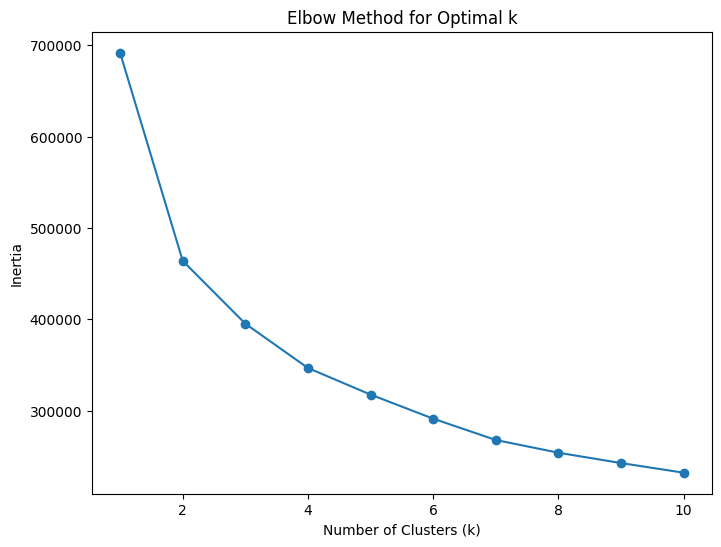

In [ ]:
# elbow method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=7)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#appling k means for n_cluster=4

kmeans_tbs = KMeans(n_clusters=4, random_state=7)
kmeans_tbs.fit(features_scaled)
customer_tbs['Cluster'] = kmeans_tbs.labels_


In [ ]:
# evaluating customer_tbs k means model

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(features_scaled, customer_tbs['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, customer_tbs['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.20934436643155124
Davies-Bouldin Index: 1.457446700066492


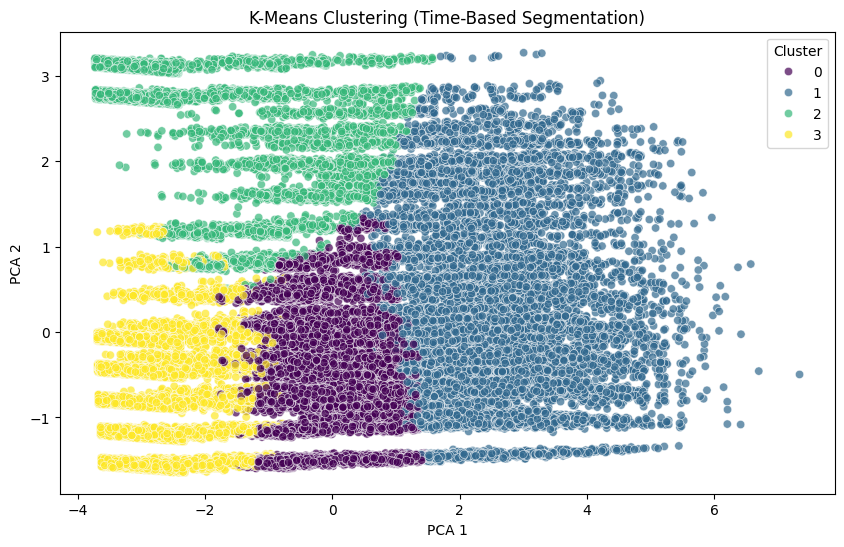

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Add PCA results and cluster labels to the data
customer_tbs['PCA1'] = features_pca[:, 0]
customer_tbs['PCA2'] = features_pca[:, 1]

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=customer_tbs, alpha=0.7)
plt.title('K-Means Clustering (Time-Based Segmentation)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
#cluster summary

# Group by cluster and calculate mean values for each feature
cluster_summary = customer_tbs.groupby('Cluster').mean()
cluster_summary

Recency  Unique_Months  Unique_Weeks  Unique_Quarters  \
Cluster                                                             
0         78.282430       2.719752      3.004333         2.270813   
1         51.694493       4.484069      5.150735         3.312570   
2        127.278268       2.077640      2.258688         1.744957   
3        186.719431       1.464868      1.563580         1.208901   

         Unique_Seasons  Most_Common_DayOfWeek   Avg_Hour  Weekend_Proportion  \
Cluster                                                                         
0              2.270813               1.197179  11.520074            0.208007   
1              3.312570               2.410215  11.501980            0.289816   
2              1.744957               4.975335  11.349606            0.772386   
3              1.208901               1.690129  11.563867            0.072949   

             PCA1      PCA2  
Cluster                      
0       -0.099413 -0.555034  
1        2.308709  0.159736  
2       -1.332416  2.209780  
3       -2.474444 -0.740289

**Cluster 0: "Stable Buyers with Minimal Weekend Engagement"**

* Moderate engagement, and has low weekend activity.

**Cluster 1: "Engaged Recent Customers with Frequent Visits"**

* Recent customers who shop frequently, and have moderate weekend activity.

**Cluster 2: "Seasonal Shoppers with a Strong Weekend Focus"**

* Less recent customers who shop mainly on weekends with moderate overall engagement.

**Cluster 3: "Dormant Customers with Limited Interaction and Weekend Activity"**

* Least recent customers with low overall engagement and minimal weekend activity.

##**Product Based Segmentation**

In [ ]:
pbs=df[['Customer_ID','Transaction_ID','Product_Brand','Product_Category','Product_Type','Amount']]

In [ ]:
pbs.head()

Customer_ID Transaction_ID  Product_Brand Product_Category Product_Type  \
0     37249.0      8691788.0           Nike         Clothing       Shorts   
1     69749.0      2174773.0        Samsung      Electronics       Tablet   
2     30192.0      6679610.0  Penguin Books            Books   Children's   
3     62101.0      7232460.0     Home Depot       Home Decor        Tools   
4     27901.0      4983775.0         Nestle          Grocery    Chocolate   

       Amount  
0  108.028757  
1  403.353907  
2  354.477600  
3  352.407717  
4  124.276524

Based on these columns, we can create the following features:

1)Most Frequent Product Category:

* Feature: The product category that each customer buys
most frequently.
* Calculation: Mode or count of Product_Category.

2) Most Frequent Product Brand:

* Feature: The brand that each customer buys most frequently.
* Calculation: Mode or count of Product_Brand.

3) Most Frequent Product Type:

* Feature: The type of product each customer buys most frequently.
* Calculation: Mode or count of Product_Type.

4) Total Spending:

* Feature: The total amount spent by each customer.
* Calculation: Sum of Amount for each customer.

5) Purchase Frequency:

* Feature: Number of transactions each customer has made.
* Calculation: Count of Transaction_ID.

In [ ]:
# Aggregate product-related metrics
product_metrics = pbs.groupby('Customer_ID').agg({
    'Product_Category': lambda x: x.value_counts().idxmax(),  # Most frequent category
    'Product_Brand': lambda x: x.value_counts().idxmax(),  # Most frequent brand
    'Product_Type': lambda x: x.value_counts().idxmax(),  # Most frequent type
    'Amount': 'sum',  # Total spending
    'Transaction_ID': 'count'  # Number of transactions
}).reset_index()

product_metrics.rename(columns={
    'Product_Category': 'Most_Frequent_Category',
    'Product_Brand': 'Most_Frequent_Brand',
    'Product_Type': 'Most_Frequent_Type',
    'Amount': 'Total_Spending',
    'Transaction_ID': 'Purchase_Frequency'
}, inplace=True)

In [ ]:
product_metrics.head()

Customer_ID Most_Frequent_Category Most_Frequent_Brand Most_Frequent_Type  \
0      10000.0               Clothing                Nike             Shorts   
1      10001.0                Grocery           Coca-Cola         Soft Drink   
2      10002.0             Home Decor   Bed Bath & Beyond         Literature   
3      10003.0            Electronics           Whirepool             Fridge   
4      10004.0                Grocery              Nestle          Chocolate   

   Total_Spending  Purchase_Frequency  
0      940.297743                   4  
1     1517.921543                   5  
2     1117.164676                   5  
3      266.301835                   2  
4      460.702696                   2

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
product_metrics['Most_Frequent_Category'] = le.fit_transform(product_metrics['Most_Frequent_Category'])
product_metrics['Most_Frequent_Brand'] = le.fit_transform(product_metrics['Most_Frequent_Brand'])
product_metrics['Most_Frequent_Type'] = le.fit_transform(product_metrics['Most_Frequent_Type'])

In [ ]:
product_metrics.head()

Customer_ID  Most_Frequent_Category  Most_Frequent_Brand  \
0      10000.0                       1                   10   
1      10001.0                       3                    4   
2      10002.0                       4                    2   
3      10003.0                       2                   16   
4      10004.0                       3                    9   

   Most_Frequent_Type  Total_Spending  Purchase_Frequency  
0                  23      940.297743                   4  
1                  26     1517.921543                   5  
2                  18     1117.164676                   5  
3                   9      266.301835                   2  
4                   4      460.702696                   2

In [ ]:
from sklearn.preprocessing import StandardScaler

features = product_metrics[['Most_Frequent_Category', 'Most_Frequent_Brand', 'Most_Frequent_Type', 'Total_Spending', 'Purchase_Frequency']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
features_scaled_df_pbs = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df_pbs.head()

Most_Frequent_Category  Most_Frequent_Brand  Most_Frequent_Type  \
0               -0.783279             0.247142            0.480621   
1                0.698390            -0.928281            0.794124   
2                1.439224            -1.320089           -0.041885   
3               -0.042445             1.422566           -0.982396   
4                0.698390             0.051238           -1.504902   

   Total_Spending  Purchase_Frequency  
0        0.142812            0.346863  
1        1.269892            0.923402  
2        0.487921            0.923402  
3       -1.172312           -0.806214  
4       -0.792991           -0.806214

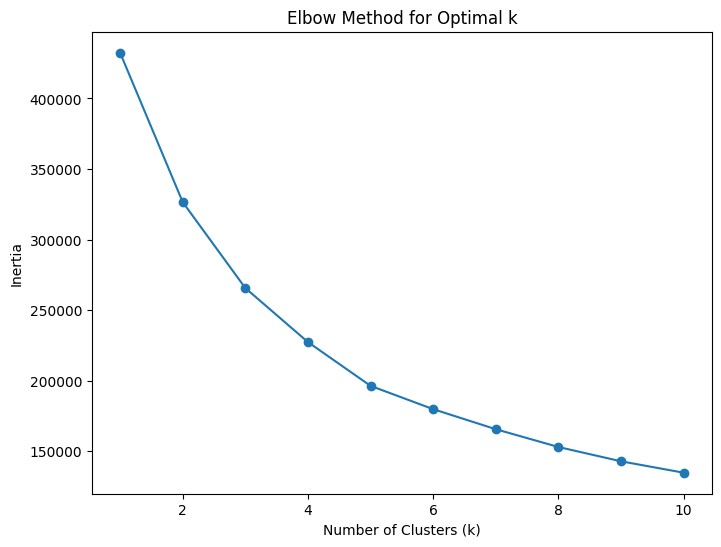

In [ ]:
# prompt: apply elbow method and plot graph

# elbow method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=7)
    kmeans.fit(features_scaled_df_pbs)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
product_metrics['Cluster'] = kmeans.fit_predict(features_scaled)

In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(features_scaled, product_metrics['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, product_metrics['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.24719409227480393
Davies-Bouldin Index: 1.3625208402592341


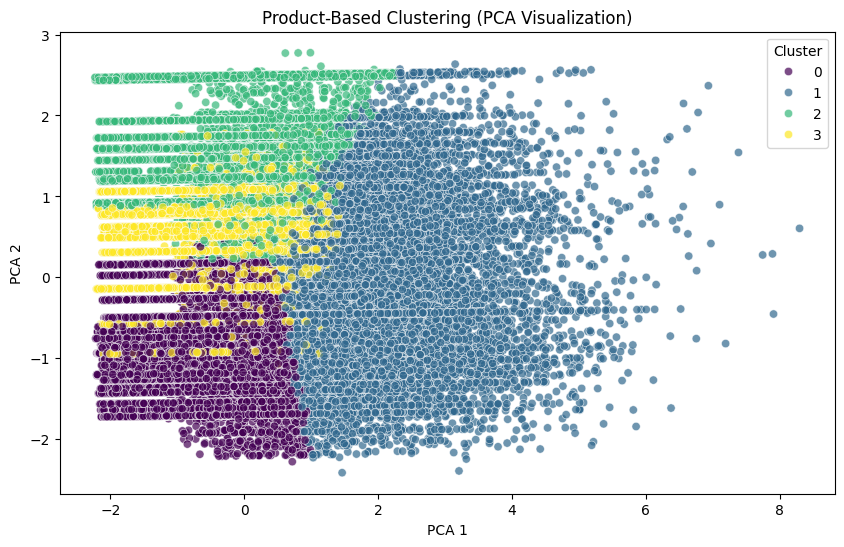

In [ ]:
# Reduce dimensions to 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Add PCA results and cluster labels to the dataframe
product_metrics['v1'] = features_pca[:, 0]
product_metrics['v2'] = features_pca[:, 1]

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='v1', y='v2', hue='Cluster', palette='viridis', data=product_metrics, alpha=0.7)
plt.title('Product-Based Clustering (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
cluster_summary = product_metrics.groupby('Cluster').mean()

# Display the summary
cluster_summary

Customer_ID  Most_Frequent_Category  Most_Frequent_Brand  \
Cluster                                                              
0        55051.558388                1.566477            12.986437   
1        55149.622043                1.981761             9.605169   
2        54964.336905                3.631621             5.576464   
3        54798.491696                1.567111             2.637361   

         Most_Frequent_Type  Total_Spending  Purchase_Frequency        v1  \
Cluster                                                                     
0                 20.405905      616.172570            2.543934 -0.685838   
1                 19.894709     1547.240407            5.681151  1.873785   
2                  7.917265      711.009668            2.880068 -0.467377   
3                 22.883150      677.956722            2.781384 -0.495617   

               v2  
Cluster            
0       -0.880130  
1       -0.181687  
2        1.552795  
3        0.401239

**Cluster 0: "High Value Customers with Specific Preferences"**

* Characteristics: High total spending, moderate purchase frequency, and specific product preferences.

**Cluster 1: "Premium High Frequency Shoppers"**

* Characteristics: Highest total spending, highest purchase frequency, and strong product preferences.

**Cluster 2: "Moderate Spenders with Specific Preferences"**

* Characteristics: Moderate spending and purchase frequency, with specific product preferences.

**Cluster 3: "Moderate Spenders with Diverse Preferences"**

* Characteristics: Moderate spending and purchase frequency, with diverse product preferences.

##Feedback and Rating Segmentation

In [ ]:
frs=df[['Customer_ID','Feedback','Ratings']]

In [ ]:
frs.head()

Customer_ID   Feedback  Ratings
0     37249.0  Excellent      5.0
1     69749.0  Excellent      4.0
2     30192.0    Average      2.0
3     62101.0  Excellent      4.0
4     27901.0        Bad      1.0

In [ ]:
frs_mapping={'Excellent':4,'Good':3,'Average':2,'Bad':1}
frs['Feedback']=frs['Feedback'].map(frs_mapping)

# Create new features
frs['Average_Rating'] = frs.groupby('Customer_ID')['Ratings'].transform('mean')
frs['Rating_Frequency'] = frs.groupby('Customer_ID')['Ratings'].transform('count')
frs['Feedback_Frequency'] = frs.groupby('Customer_ID')['Feedback'].transform('count')

In [ ]:
frs.head()

Customer_ID  Feedback  Ratings  Average_Rating  Rating_Frequency  \
0     37249.0         4      5.0        3.400000                 5   
1     69749.0         4      4.0        2.800000                 5   
2     30192.0         2      2.0        4.000000                 4   
3     62101.0         4      4.0        3.333333                 3   
4     27901.0         1      1.0        1.333333                 3   

   Feedback_Frequency  
0                   5  
1                   5  
2                   4  
3                   3  
4                   3

In [ ]:
# Aggregate data by Customer_ID
feedback_metrics = frs.groupby('Customer_ID').agg({
    'Average_Rating': 'mean',
    'Feedback': 'mean',
    'Rating_Frequency': 'sum',
    'Feedback_Frequency': 'sum'
}).reset_index()

In [ ]:
feedback_metrics.head()

Customer_ID  Average_Rating  Feedback  Rating_Frequency  Feedback_Frequency
0      10000.0             3.5       3.0                16                  16
1      10001.0             3.6       3.2                25                  25
2      10002.0             3.2       3.0                25                  25
3      10003.0             2.5       2.5                 4                   4
4      10004.0             3.0       2.5                 4                   4

In [ ]:
# Standardize features
features = feedback_metrics[['Average_Rating', 'Feedback', 'Rating_Frequency', 'Feedback_Frequency']]
scaler = StandardScaler()
features_scaled_frs = scaler.fit_transform(features)

In [ ]:
# Create a DataFrame from the scaled features
features_scaled_df_frs = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df_frs.head()

Average_Rating  Feedback  Rating_Frequency  Feedback_Frequency
0        0.400278  0.241743          0.098979            0.098979
1        0.519376  0.543499          0.716466            0.716466
2        0.042985  0.241743          0.716466            0.716466
3       -0.790700 -0.512648         -0.724338           -0.724338
4       -0.195211 -0.512648         -0.724338           -0.724338

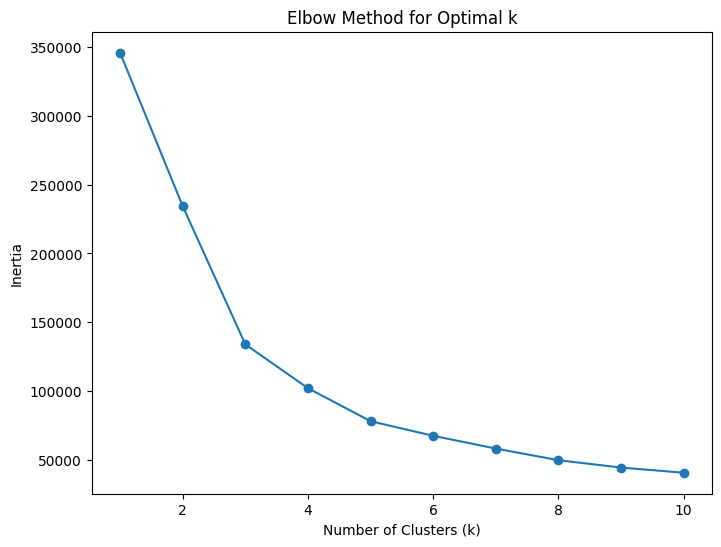

In [ ]:
# elbow method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=7)
    kmeans.fit(features_scaled_df_frs)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42,init='k-means++')
feedback_metrics['Cluster'] = kmeans.fit_predict(features_scaled_frs)

In [ ]:
# prompt: for 3 clusters and apply kmeans++ also

# Apply K-means clustering with 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
feedback_metrics['Cluster'] = kmeans.fit_predict(features_scaled_frs)


In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(features_scaled_frs, feedback_metrics['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled_frs, feedback_metrics['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.41088334325599046
Davies-Bouldin Index: 0.8351938721457158


In [ ]:
# prompt: run the loop and find the Silhouette Score and Davies-Bouldin Index for clusters 2,3,4,5,6,7,8.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(features_scaled_frs)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(features_scaled_frs, cluster_labels)
    db_avg = davies_bouldin_score(features_scaled_frs, cluster_labels)

    print(f"For n_clusters={num_clusters}, the Silhouette Score is {silhouette_avg}")
    print(f"For n_clusters={num_clusters}, the Davies-Bouldin score is {db_avg}")


For n_clusters=2, the Silhouette Score is 0.3770428035783677
For n_clusters=2, the Davies-Bouldin score is 1.0610744454618783
For n_clusters=3, the Silhouette Score is 0.4196354517389951
For n_clusters=3, the Davies-Bouldin score is 0.7964111195297415
For n_clusters=4, the Silhouette Score is 0.36529321936175085
For n_clusters=4, the Davies-Bouldin score is 0.8971572975047155
For n_clusters=5, the Silhouette Score is 0.39208504152548657
For n_clusters=5, the Davies-Bouldin score is 0.8369747191910756
For n_clusters=6, the Silhouette Score is 0.35254324714442986
For n_clusters=6, the Davies-Bouldin score is 0.9223137167937655
For n_clusters=7, the Silhouette Score is 0.3749787520792237
For n_clusters=7, the Davies-Bouldin score is 0.8453709398039554
For n_clusters=8, the Silhouette Score is 0.3816613867618664
For n_clusters=8, the Davies-Bouldin score is 0.8392349752290865


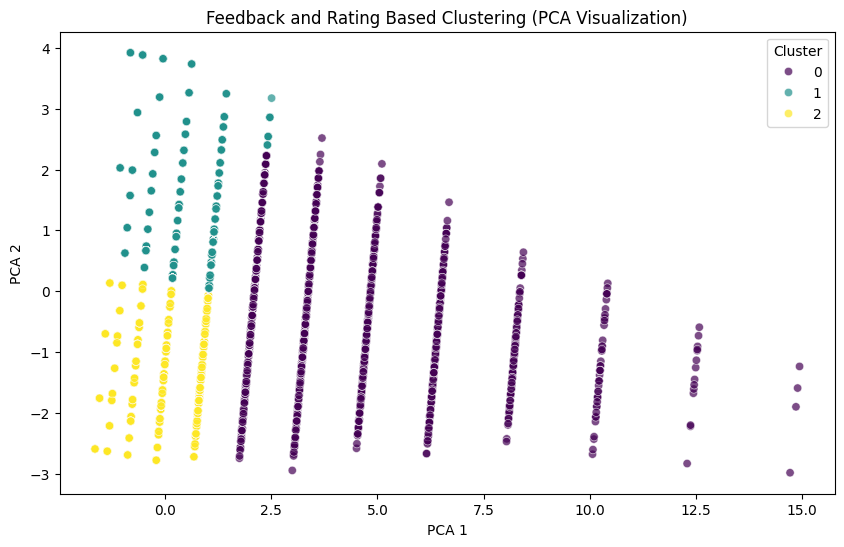

In [ ]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled_frs)

# Add PCA results and cluster labels to the dataframe
feedback_metrics['v1'] = features_pca[:, 0]
feedback_metrics['v2'] = features_pca[:, 1]

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='v1', y='v2', hue='Cluster', palette='viridis', data=feedback_metrics, alpha=0.7)
plt.title('Feedback and Rating Based Clustering (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()



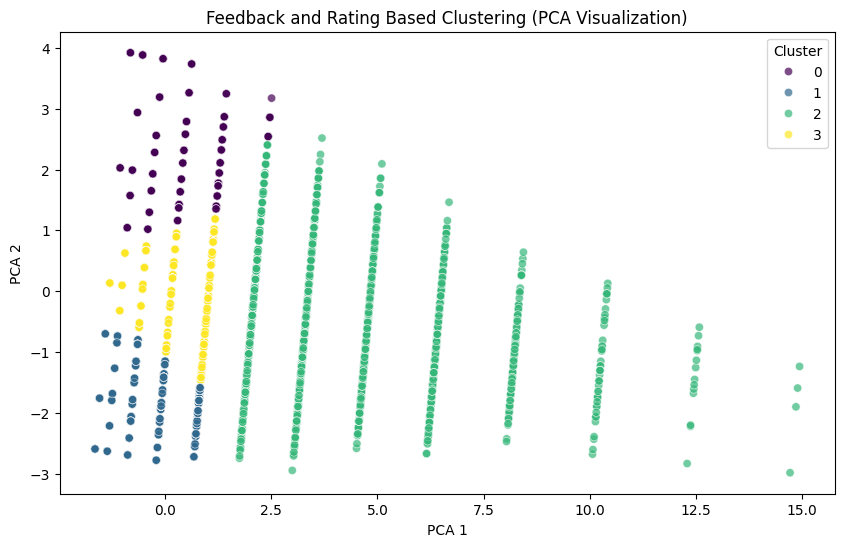

In [ ]:
# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
feedback_metrics['Cluster'] = kmeans.fit_predict(features_scaled_frs)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled_frs)

# Add PCA results and cluster labels to the dataframe
feedback_metrics['v1'] = features_pca[:, 0]
feedback_metrics['v2'] = features_pca[:, 1]

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='v1', y='v2', hue='Cluster', palette='viridis', data=feedback_metrics, alpha=0.7)
plt.title('Feedback and Rating Based Clustering (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Group by cluster and calculate mean values for each feature
cluster_summary = feedback_metrics.groupby('Cluster').mean()
cluster_summary

Customer_ID  Average_Rating  Feedback  Rating_Frequency  \
Cluster                                                             
0        54906.302599        2.028163  1.942354          7.584427   
1        55031.122912        4.176387  3.608212          6.897377   
2        55205.018358        3.163179  2.839532         45.620627   
3        54991.921460        3.166499  2.860364         13.762041   

         Feedback_Frequency        v1        v2  
Cluster                                          
0                  7.584427 -0.428044  1.984324  
1                  6.897377 -0.949631 -1.564549  
2                 45.620627  2.989739 -0.381899  
3                 13.762041 -0.079604 -0.014152

**Cluster 0: "Frequent Low-Rating Providers"**

* Customers who frequently provide low ratings and feedback.

**Cluster 1: "Highly Satisfied and Frequent Feedback Providers"**

* Customers who are highly satisfied and frequently provide feedback.

**Cluster 2: "High Feedback Activity with Moderate Satisfaction"**

* Customers with high feedback and rating frequency but moderate satisfaction levels.

**Cluster 3: "Moderate Feedback Providers with Moderate Satisfaction"**

* Customers with moderate levels of feedback activity
and satisfaction.